# Notebook 3 - Simulated annealing for the TSP

CSI4106 Artificial Intelligence  
Fall 2021  
Version 1 (2020) prepared by Julian Templeton. Version 2 (2021) adapted by Caroline Barrière.

***INTRODUCTION***:

This homework will allow you to explore the *Simulated Annealing* search algorithm. It is a good example of a *random modification* algorithm, in which we start with a greedy solution, and then make changes and accept the modified solutions with different probabilities given their level of fitness to a cost function.

The application domain for experimenting with *Simulated Annealing* is the traveling salesman problem (TSP), which is a classical problem of scheduling, with optimization on the cost of travel.  In TSP, the traveler must visit all the cities in the smallest amount of time or in the shortest distance.  In our definition of the problem, distance will be the cost that we want to minimize.

The notebook will lead into the *Simulated Annealing* portion after exploring a *Greedy Search* and a *Random Step* approach as well.  Remember that in *random step*, we follow a greedy search, but sometimes (at some steps) we make a different choice.

***HOMEWORK***:  

Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, write your name and student number at the bottom and submit it.  Don't forget to rename the notebook to *StudentNumber-LastName-Notebook3.ipynb*.

*The notebook will be marked on 25.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Let's start with a small set of cities.**

In [1]:
# let's define 5 cities with a label and a (x,y) coordinate
cities = {'A': (0,0), 'B': (1,1), 'C': (1,0), 'D': (1,-1), 'E': (-1,-1)}

Let's plot the nodes using the *showNodes* method below.  
The packages matplotlib, networkx, and numpy must be installed first.  
To do so, open a command prompt and type **pip install numpy** and **pip install networkx** (If you are using linux or potentially Mac, you may need to use **pip3** rather than **pip** depending on how you set it up). You should already have matplotlib, but if not use the pip command **pip install matplotlib**. After installing the packages, run the cell below. If it does not work, restart the Kernel and run through it again to be able to run the cell.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# small method to show nodes
# provide defaults for figure size (size), as well as x and y axis
def showNodes(nodeDict, size= (6.5, 4), xLim=[-2,2], yLim=[-2,2]):
    fig = plt.figure(figsize=size)
    axg = fig.add_subplot(111)
    axg.set_xlim(xLim)
    axg.set_ylim(yLim)

    G=nx.Graph()
    for k in nodeDict.keys():
        G.add_node(k, coor=nodeDict.get(k))
    
    pos=nx.get_node_attributes(G,'coor')
    nx.draw(G, pos, with_labels = True)
    plt.axis('on')
    plt.show()

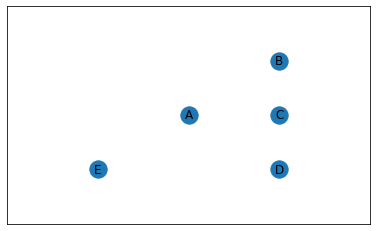

In [3]:
# show the cities on a map
showNodes(cities)

#### 2. Let's measure the distances between all cities.
First, we define a method to calculate the distance between two specific cities, and then a method to find the distances between all pairs of nodes.

In [4]:
import math

# returns the euclidian distance between two nodes
def dist(node1, node2):
    return round(math.sqrt(math.pow(node1[0] - node2[0], 2) + math.pow(node1[1] - node2[1], 2)), 3)

In [5]:
# Small test to see the distance
dist(cities.get('A'), cities.get('B'))

1.414

In [6]:
# building a dictionary of all pairs or distances
def distDict(nodes):
    distance = {}
    # go through all pairs of nodes
    for k in nodes.keys():
        for m in nodes.keys():
            distance[k,m] = dist(nodes.get(k), nodes.get(m))
    return distance

In [7]:
# showing the distances between the cities
distances = distDict(cities)
print(distances)

{('A', 'A'): 0.0, ('A', 'B'): 1.414, ('A', 'C'): 1.0, ('A', 'D'): 1.414, ('A', 'E'): 1.414, ('B', 'A'): 1.414, ('B', 'B'): 0.0, ('B', 'C'): 1.0, ('B', 'D'): 2.0, ('B', 'E'): 2.828, ('C', 'A'): 1.0, ('C', 'B'): 1.0, ('C', 'C'): 0.0, ('C', 'D'): 1.0, ('C', 'E'): 2.236, ('D', 'A'): 1.414, ('D', 'B'): 2.0, ('D', 'C'): 1.0, ('D', 'D'): 0.0, ('D', 'E'): 2.0, ('E', 'A'): 1.414, ('E', 'B'): 2.828, ('E', 'C'): 2.236, ('E', 'D'): 2.0, ('E', 'E'): 0.0}


Let's also add a method to find the closest city to another city. This method will be useful later.

In [8]:
# find the min distance from node1 to all other nodes.
# it receives the node1 label, the labels of other nodes to test,
# and the precalculated distances between all nodes
def closestNode(node1_label, otherNodes_Labels, distanceDict):
    # tricky syntax... it creates tuples where the distance is the first element of the tuple
    # and the position in the array is the second element of the tuple
    minDist = min( (distanceDict[node1_label,k], k) for k in otherNodes_Labels)
    # get the second element of the tuple which is the index found
    foundNode = minDist[1]
    return foundNode

In [9]:
# Testing the closest node
closestNode('B', ['C', 'D'], distances)

'C'

#### 3. Greedy solution first 
The first solution we explore is a Greedy solution.

In [10]:
# greedy solution
import random
def greedy_solution(nodes):
    # distance matrix
    allDist = distDict(nodes)
    # pick a first node at random among the set of keys (node names)
    cur_node = random.choice(list(nodes.keys()))
    # add that node to solution
    solution = [cur_node]
    # build a free list of nodes (not yet used) containing all nodes except the one just chosen 
    free_list = list(nodes.keys())
    free_list.remove(cur_node)
    
    # while there are still nodes to be attached
    while free_list:
        # find the closestNode
        found_node = closestNode(cur_node, free_list, allDist)
        cur_node = found_node
        free_list.remove(cur_node)
        solution.append(cur_node)

    return solution

In [11]:
# Test obtaining a greedy solution
gs1 = greedy_solution(cities)
print(gs1)

['D', 'C', 'A', 'B', 'E']


**(TO DO) Q1 - 2 marks**  
There are cases in TSP in which the start city is defined.  
(a) Define a new greedy solution method in which you include an additional parameter which is the name of the starting node. \
(b) Test your method with starting node 'B'.  Show the solution found.

In [12]:
# ANSWER - Q1 - Part 1
# Copy-paste from greedy_solution and make a small change
# greedy solution
import random
def greedy_solution_with_fixed_start(nodes, start):
    #distance Matrix
    allDist=distDict(nodes)
    #Put starting node at the beginning
    cur_node=start
    solution=[cur_node]
    #create free list and now remove the start node
    free_list=list(nodes.keys())
    free_list.remove(cur_node)
    while free_list:
        #find closest node
        found_node= closestNode(cur_node, free_list, allDist)
        cur_node=found_node
        free_list.remove(cur_node)
        solution.append(cur_node)

    return solution

In [13]:
# ANSWER - Q1 - Part 2
# Test your new method with starting node 'B'
gs2 = greedy_solution_with_fixed_start(cities,'B')
print(gs2)

['B', 'C', 'A', 'D', 'E']


#### 4. Calculating the distance travelled, and showing a path.  


When we have a solution for the TSP, we want to know the total distance traveled with that solution.

**(TO DO) Q2 - 2 marks**  
Complete the method to find the total length of the path found.  

In [14]:
# ANSWER Q2 - Fill in the missing lines
def totalDist(path, distanceDict):
    total = 0
    for i in range(len(path) - 1):
        x = path[i]
        # The two lines below
        y = path[i+1]
        total += distanceDict[x,y]
    return round(total,3)

In [15]:
# Test the total distance method
print(gs1)
print(totalDist(gs1, distances))
print(gs2)
print(totalDist(gs2, distances))

['D', 'C', 'A', 'B', 'E']
6.242
['B', 'C', 'A', 'D', 'E']
5.414


Now, we would like to see the path found.  We slightly modify to showNodes method from before, to become showPath, wich is now a directed graph.  

In [16]:
# small method to show a path
# it receives an ordered list of nodes e.g. ['B','C','A', 'D', 'E']
# and a dictionary of all the nodes and their positions
def showPath(path, nodeDict, size= (6.5, 4), xLim=[-2,2], yLim=[-2,2]):
    fig = plt.figure(figsize=size)
    axg = fig.add_subplot(111)
    axg.set_xlim(xLim)
    axg.set_ylim(yLim)

    G=nx.DiGraph()
    for k in path:
        G.add_node(k, pos=nodeDict.get(k))
        
    for i in range(len(path) - 1):
        x = path[i]
        y = path[i + 1]
        G.add_edge(x,y)
        
    pos=nx.get_node_attributes(G,'pos')
    nx.draw(G, pos, with_labels = True, edge_color = ['b', 'r', 'c', 'y', 'g', 'm'], arrows=True)   
    # nx.draw(G, pos, with_labels = True)
    plt.axis('on')
    plt.show()

**(TO DO) Q3 - 2 marks**  
Show the path obtained with the greedy search (any start node) and the greedy search with 'A' as start node.  *ATTENTION: since the nodes B, C and D are aligned vertically, it is possible that a solution contains an arc from B to D or D to B, but it will be hidden behind node C.*

['D', 'C', 'A', 'B', 'E']


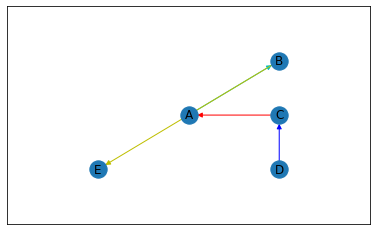

['A', 'C', 'B', 'D', 'E']


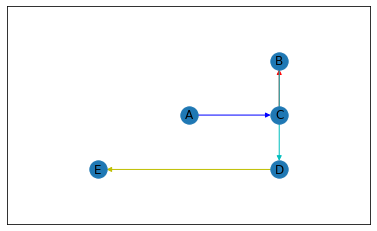

In [17]:
# ANSWER - Q3
# Show paths
... 
# Testing to output the path chosen by the greedy solution
gs1 = greedy_solution(cities)
print(gs1)
showPath(gs1, cities)
# Testing to output the path chosen by the greedy solution with start 'A'
gs3 = greedy_solution_with_fixed_start(cities,'A')
print(gs3)
showPath(gs3, cities)

 **(TO DO) Q4 - 4 marks**  
Add three more cities (wherever you want within the predefined -2 to +2 axis as long as no other node is already there).  Rerun the full sequence of tasks performed above on the larger set of cities that you will define below: \
(1) defining the graph \
(2) showing the points \
(3) building the distance dictionary \
(4) finding two unique greedy solutions (without fixing the start node) \
(5) showing the different paths found along with their total distances.

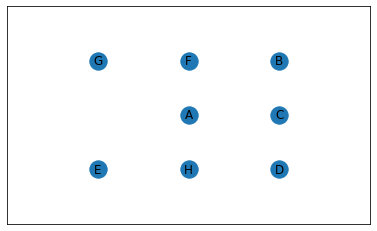

['D', 'C', 'A', 'F', 'B', 'G', 'E', 'H']


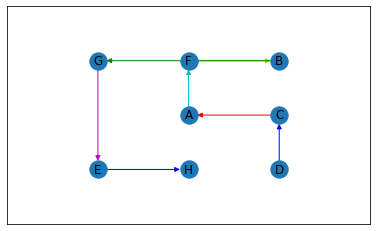

9.0
['B', 'C', 'A', 'D', 'E']


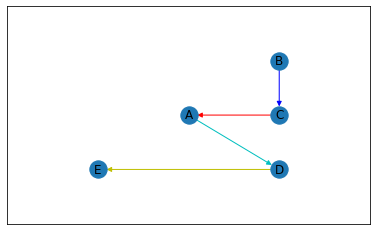

5.414


In [18]:
# ANSWER - Q4 
# (1) Defining a larger set of cities  (add two more)
moreCities = {'A': (0,0), 'B': (1,1), 'C': (1,0), 'D': (1,-1), 'E': (-1,-1), 'F':  (0,1), 'G' :(-1,1), 'H':(0,-1)}
# (2) Show the points ... 
showNodes(moreCities)
# (3) Build the distance dictionary
distances = distDict(moreCities)
# (4) Find two unique greedy solutions (hint: generate one, and then generate a second one until different) 
gs1= greedy_solution(moreCities)
while gs1==gs2:
    gs2=greedy_solution(moreCities)
    
# (5) Show the two unique paths found above along with their total distances
print(gs1)
showPath(gs1,moreCities)
print(totalDist(gs1, distances))
print(gs2)
showPath(gs2,moreCities)
print(totalDist(gs2, distances))

**5. Random Step Algorithm**

For our Random Step algorithm, we will first define a new function called kClosestNodes that will return the k-closest nodes to a given node.  This will be useful for taking a step different from the best one, but still not totally random to any node.

In [19]:
# find the min distance from node1 to all other nodes.
# it receives the node1 label, the labels of other nodes to test,
# the precalculated distances between all nodes, and k for how many to return
# The function then outputs a list of the k-closest nodes, where the
# first is the closest and the kth is the kth-closest
def kClosestNodes(node1_label, otherNodes_Labels, distanceDict, k):
    kClosest = []
    # Create a sorted distance list based on the values from the distance dictionary
    # This has the form [((node_1, node_2),value_1), ..., ((node_n, node_n), value_n)]
    sortedDistances = sorted(distanceDict.items(), key=lambda keyPair: keyPair[1])
    # Iterate through the sorted distance list to find our k min distances
    # from node1_label
    for key, value in sortedDistances:
        if (k > 0 and key[0] == node1_label and key[1] in otherNodes_Labels):
            k -= 1
            kClosest.append(key[1])
    return kClosest

In [20]:
# Example usage
# View the distance dictionary to verify correctness when finding the closest nodes
# to node B in cities
print(distances)
# Find the two closest nodes to the node B in cities (using its distance dictionary)
kClosestNodes('B', ['A', 'C', 'D', 'E'], distances, 2)

{('A', 'A'): 0.0, ('A', 'B'): 1.414, ('A', 'C'): 1.0, ('A', 'D'): 1.414, ('A', 'E'): 1.414, ('A', 'F'): 1.0, ('A', 'G'): 1.414, ('A', 'H'): 1.0, ('B', 'A'): 1.414, ('B', 'B'): 0.0, ('B', 'C'): 1.0, ('B', 'D'): 2.0, ('B', 'E'): 2.828, ('B', 'F'): 1.0, ('B', 'G'): 2.0, ('B', 'H'): 2.236, ('C', 'A'): 1.0, ('C', 'B'): 1.0, ('C', 'C'): 0.0, ('C', 'D'): 1.0, ('C', 'E'): 2.236, ('C', 'F'): 1.414, ('C', 'G'): 2.236, ('C', 'H'): 1.414, ('D', 'A'): 1.414, ('D', 'B'): 2.0, ('D', 'C'): 1.0, ('D', 'D'): 0.0, ('D', 'E'): 2.0, ('D', 'F'): 2.236, ('D', 'G'): 2.828, ('D', 'H'): 1.0, ('E', 'A'): 1.414, ('E', 'B'): 2.828, ('E', 'C'): 2.236, ('E', 'D'): 2.0, ('E', 'E'): 0.0, ('E', 'F'): 2.236, ('E', 'G'): 2.0, ('E', 'H'): 1.0, ('F', 'A'): 1.0, ('F', 'B'): 1.0, ('F', 'C'): 1.414, ('F', 'D'): 2.236, ('F', 'E'): 2.236, ('F', 'F'): 0.0, ('F', 'G'): 1.0, ('F', 'H'): 2.0, ('G', 'A'): 1.414, ('G', 'B'): 2.0, ('G', 'C'): 2.236, ('G', 'D'): 2.828, ('G', 'E'): 2.0, ('G', 'F'): 1.0, ('G', 'G'): 0.0, ('G', 'H'): 2.23

['C', 'A']

**(TO DO) Q5 - 3 marks**  
Below is defined the random step algorithm.  Fill in the missing parts. The current implementation of *Random Step* assumes that at every step, there is 50% chance of following the greedy search, and 50% chance of taking a different action among the k closest nodes.  

In [21]:
# ANSWER - Q5 
import random
import numpy as np

# k represents the number of closest nodes to be returned from the
# function kClosestNodes
def random_step(nodes, k):
    # distance matrix
    allDist = distDict(nodes)
    # pick a first node at random among the set of keys (node names)
    cur_node = random.choice(list(nodes.keys()))
    # add that node to solution
    solution = [cur_node]
    # build a free list of nodes (not yet used) containing all nodes except the one just chosen 
    free_list = list(nodes.keys())
    free_list.remove(cur_node)
    
    # while there are still nodes to be attached
    while len(free_list) != 0:
        
        # if greedy_or_not is 0, chose among the k closest nodes, otherwise, do greedy meaning reduce k to 1
        greedy_or_not = random.randint(0,1)
        if (greedy_or_not == 0):
            nbPoss = k
        else:
            nbPoss = 1
        # define the possible nodes for that step    
        possibilities = kClosestNodes(cur_node,free_list,allDist,nbPoss)
        print(possibilities)
        # randomly choose one node among the possibilities
        found_node = random.choice(possibilities)
        
        # Add the found node on the solution and remove from free list
        cur_node = found_node
        free_list.remove(cur_node)
        solution.append(cur_node)
        
    return solution

**(TO DO) Q6 - 5 marks**  
Perform some tests and evaluation. \
(a) Run the greedy search 3 times.  \
(b) Run the random step 3 times with k = 2.  \
(c) Run the random step 3 times with k = 3.  
For each test, show the path found and its length.  \
Then, at the end, show average results for each of (a, b, c). \
Finally, discuss the results obtained.  Is the random step better? Does k-2 versus k=3 make a difference?

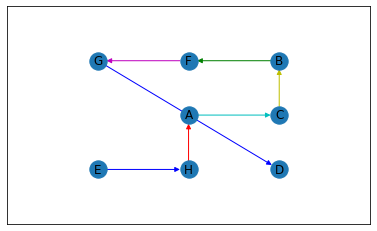

Total distance for Greedy Algorithm test 1: 8.828


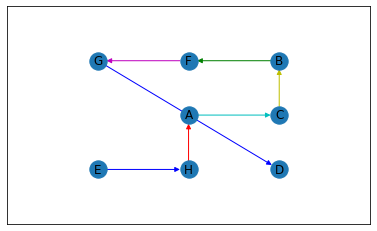

Total distance for Greedy Algorithm test 2: 8.828


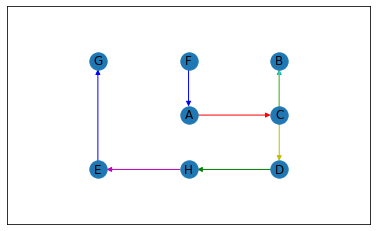

Total distance for Greedy Algorithm test 3: 9.0
['C', 'F']
['A', 'G']
['A', 'E']
['C', 'H']
['D', 'E']
['D', 'C']
['C']


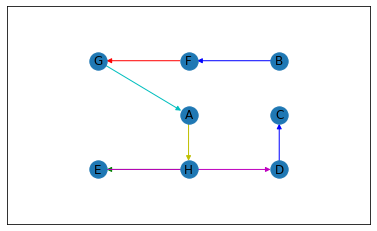

Total distance for random step with k=2 test 1: 8.414
['A', 'B']
['F', 'H']
['D']
['B', 'E']
['G', 'F']
['F', 'B']
['B']


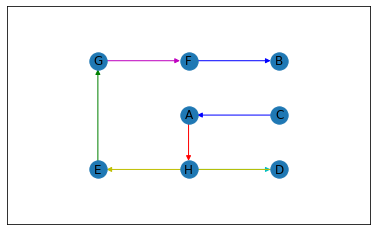

Total distance for random step with k=2 test 2: 9.0
['H']
['A']
['C']
['B']
['F', 'D']
['F', 'G']
['G']


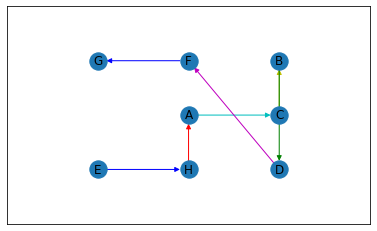

Total distance for random step with k=2 test 3: 9.236
['A']
['C']
['B', 'D', 'H']
['H', 'B', 'E']
['E']
['G']
['B']


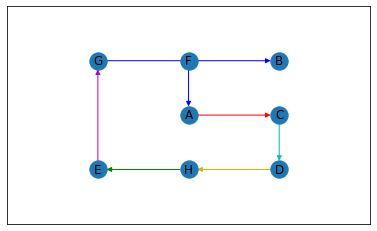

Total distance for random step with k=3 test 1: 9.0
['A']
['F', 'H', 'B']
['B']
['D']
['H']
['E', 'G']
['G']


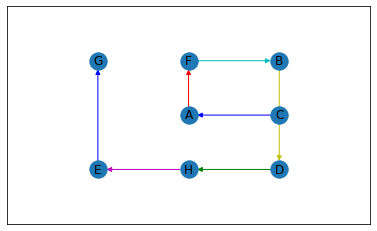

Total distance for random step with k=3 test 2: 9.0
['A']
['F']
['B']
['D']
['H', 'E', 'G']
['H']
['G']


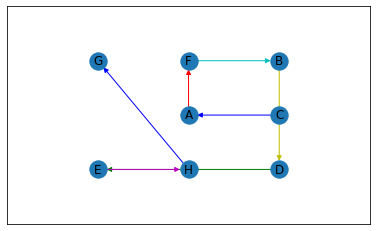

Total distance for random step with k=3 test 3: 10.236
The average distance for the greedy algorithm was: 8.885
The average distance for the random step with k=2 algorithm was: 8.883
The average distance for the random step with k=3 algorithm was: 9.412


In [22]:
# ANSWER Q6 - Coding part
# Perform tests
#Greedy Search test
distanceAVGGreedy=0
test=1
for i in range(3):
    gs1= greedy_solution(moreCities)
    showPath(gs1,moreCities)
    print("Total distance for Greedy Algorithm test "+str(test)+": "+str(totalDist(gs1, distances)))
    distanceAVGGreedy+=totalDist(gs1, distances)
    test+=1
distanceAVGGreedy=round((distanceAVGGreedy/3),3)
test=1


#Random Step With k=2
distanceAVGkstep2=0
for i in range(3):
    rk2= random_step(moreCities,2)
    showPath(rk2,moreCities)
    print("Total distance for random step with k=2 test "+str(test)+": "+str(totalDist(rk2, distances)))
    distanceAVGkstep2+=totalDist(rk2, distances)
    test+=1
distanceAVGkstep2=round((distanceAVGkstep2/3),3)
test=1


#Random Step with K=3
distanceAVGkstep3=0
for i in range(3):
    rk3= random_step(moreCities,3)
    showPath(rk3,moreCities)
    print("Total distance for random step with k=3 test "+str(test)+": "+str(totalDist(rk3, distances)))
    distanceAVGkstep3+=totalDist(rk3, distances)
    test+=1
distanceAVGkstep3=round((distanceAVGkstep3/3),3)
test=1

print("The average distance for the greedy algorithm was: "+ str(distanceAVGGreedy))
print("The average distance for the random step with k=2 algorithm was: "+ str(distanceAVGkstep2))
print("The average distance for the random step with k=3 algorithm was: "+ str(distanceAVGkstep3))

Answer - Q6 - Discussion part

After conducting the tests I believe it would require more tests to get a more accurate average for the overall best performance however it seems that the greedy solution as it gives the total distance travelled to be less than the random step when K=2 and K=3. That being said k=2 and k=3 there does not seem to show which is better since if this was run another time k=2 could be better than k=3 or vice versa. This can be from the random choice of the closest node which could cause the total distance to be larger or smaller depending on the choice and since k=3 has more to choose from it has more of a chance to make the overall path longer.

**6. Defining the process of simulated annealing**  
We now look at a random modification algorithm.  More specifically, we look at *Simulated Annealing*.
The class below defines the simulated annealing process.  This class is an adaptation of the class anneal.py found in the python code provided in this github https://github.com/chncyhn/simulated-annealing-tsp. You are not asked to changed this class, just go through it and try to understand it so as to get a better understanding of the *simulated annealing* algorithm.

In [23]:
# NO MODIFICATION REQUIRED HERE
# class to perform a simulated annealing
# must start with a set of nodes, all other parameters have defaults
class SimAnneal(object):
    def __init__(self, nodes, randomStep, k=4, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        # set of nodes
        self.nodes = nodes
        # number of nodes
        self.N = len(nodes)
        # set the temperature T to sqrt(N) if not specified
        self.T = math.sqrt(self.N) if T == -1 else T
        # set alpha (rate at which the temperature is decreased)
        self.alpha = 0.995 if alpha == -1 else alpha
        # set stopping temprature
        self.stopping_temperature = 0.00000001 if stopping_T == -1 else stopping_T
        # set stopping iteration
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        # start at iteration 1
        self.iteration = 1

        # calculate the distances
        self.allDist = distDict(nodes)
        
        # start with greedy solution if randomizedGreedy is false,
        #  start with the randomized greedy solution if randomizedGreedy is true
        if (randomStep):
            self.cur_solution = random_step(nodes, k)
            self.improvementMessage = 'Improvement over random step solution: '
        else:
            self.cur_solution = greedy_solution(nodes)
            self.improvementMessage = 'Improvement over greedy solution: '
        
        # so far, the best solution is the one we have
        self.best_solution = list(self.cur_solution)

        # calculate fitness of the current solution
        self.cur_fitness = self.fitness(self.cur_solution)
        # initial fitness for initial solution
        self.initial_fitness = self.cur_fitness
        # best fitness so far
        self.best_fitness = self.cur_fitness
        # build the fitness list as we explore solutions
        self.fitness_list = [self.cur_fitness]


    def fitness(self, sol):
        """ Objective value of a solution """
        return totalDist(sol, self.allDist)

    # acceptance propability
    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current
        Depends on the current temperature and difference between candidate and current
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current
        Accept with probabilty p_accept(..) if candidate is worse
        """
        candidate_fitness = self.fitness(candidate)
        # test if fitness is smaller then the current one
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness = candidate_fitness
            self.cur_solution = candidate
            # test if fitness is better than best so far, keep it as best if so
            if candidate_fitness < self.best_fitness:
                self.best_fitness = candidate_fitness
                self.best_solution = candidate

        # if solution is worst than the current one, there is still a possibility to pursue it
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness = candidate_fitness
                self.cur_solution = candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm
        """
        # go through the temperature schedule
        print(self.T)
        print(self.stopping_temperature)
        while (self.T >= self.stopping_temperature) and (self.iteration < self.stopping_iter):
            # explore current solution
            candidate = list(self.cur_solution)
            # modify the solution to switch two cities
            # first chosen city between [2,N-1] - not changing the first city
            l = random.randint(2, self.N - 1)
            # second city between [0,N-1] Not sure why ??
            i = random.randint(0, self.N - l)
            # the chosen nodes are switch
            candidate[i:(i + l)] = reversed(candidate[i:(i + l)])
            # perform acceptance test 
            self.accept(candidate)
            # multiply the temperature by alpha (this will reduce it)
            self.T *= self.alpha
            self.iteration += 1
            
            # add current fitness to list (to be able to display)
            self.fitness_list.append(self.cur_fitness)

        print('Best fitness obtained: ', self.best_fitness)
        print(self.improvementMessage,
              round((self.initial_fitness - self.best_fitness) / (self.initial_fitness), 4))

        return self.best_solution
    
    def plot_learning(self):
        """
        Plot the fitness through iterations
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel('Fitness')
        plt.xlabel('Iteration')
        plt.show()


#### 7. Refining a solution through simulated annealing.

Before doing modification, in a *random modification* algorithm such as simulated annealing, we must have a starting solution.  Such starting solution can be provided by a greedy algorithm, or if we have something else, like the random step algorithm we worked on in the previous sections, we can use that as well as starting point.

**(TO DO) Q7 - 2 marks**  
Put comments in the code below explaining what it does.  In your comments, explain what the different parameter settings are, when calling SimAnneal. Also run it a few times.  It will show you how there can be improvement (or not) from the greedy solution or the random step solution to the annealed one.

Solution ['E', 'H', 'A', 'C', 'B', 'F', 'G', 'D'] takes a total of 8.828


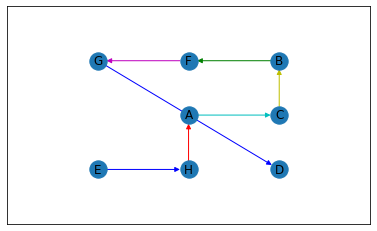

2.8284271247461903
1e-08
Best fitness obtained:  7.414
Improvement over greedy solution:  0.1762


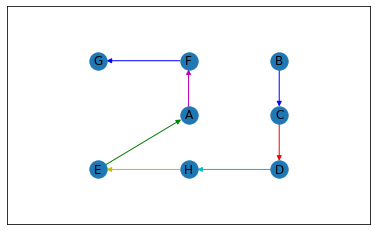

['A', 'D', 'E', 'C']
['A']
['F']
['B']
['D']
['E', 'G']
['G']
Solution ['H', 'C', 'A', 'F', 'B', 'D', 'E', 'G'] takes a total of 10.414


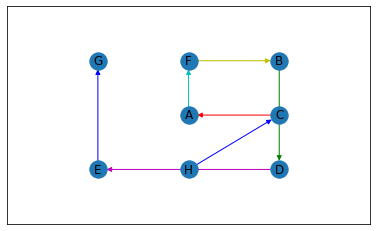

['C']
['B']
['F']
['G', 'H', 'D', 'E']
['D', 'E', 'G']
['E', 'G']
['G']
2.8284271247461903
1e-08
Best fitness obtained:  7.414
Improvement over random step solution:  0.2586


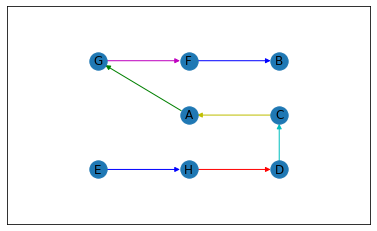

In [24]:
# ANSWER - Q7
# Include comments in the code

# Creating the first solution using the greedy algorithm solution
firstSol = greedy_solution(moreCities)
distances = distDict(moreCities)
print('Solution {} takes a total of {}'.format(firstSol,totalDist(firstSol, distances)))
showPath(firstSol, moreCities)

#Using the simulated Annealing class and initializing it with the nodes and put False for randomStep parameter to show only using greedy solution
#Then executes the anneal method to run the algorithm
sa = SimAnneal(moreCities, False)
betterSol = sa.anneal()
showPath(betterSol, moreCities)

#Creating a second solution for the random_step algorithm using a k size of 4 for the 4 closest nodes in the list
secondSol = random_step(moreCities, 4)
print('Solution {} takes a total of {}'.format(secondSol,totalDist(secondSol, distances)))
showPath(secondSol, moreCities)

#Using the simulated Annealing class and initializing the nodes to be moreCitites and putting True as the random_step parameter
#to use the random_step algorithm with k being 4. The execute the anneal method to run the algorithm
sa2 = SimAnneal(moreCities, True, 4)
betterSol2 = sa2.anneal()
showPath(betterSol2, moreCities)

**8. Moving toward a larger example**  
There are a set of coordinates defined in the file *coord.txt* (available in the Jupyter Notebooks module in Brightspace). This data file is also from the github https://github.com/chncyhn/simulated-annealing-tsp.  It contains a larger example with 45 cities, to test.  Here is the beginning of the file:

1 0 0  
2 3 5  
3 2.5 9  
4 48 16  
5 48 17  
6 69 16  
...

Make sure to put the file *coord.txt* in the same repertory as your notebook or modify the path below when opening the file to read.  We will assume the first number is the label, and the other two numbers are the coordinates.

In [25]:
# reading the coordinates
manyCities = {}
with open('coord.txt','r') as f:
    i = 0
    for line in f.readlines():
        line = [float(x.replace('\n','')) for x in line.split(' ')]
        label = str(int(line[0]))
        manyCities[label] = (line[1], line[2])
        i += 1

Show the nodes from that larger set of cities.

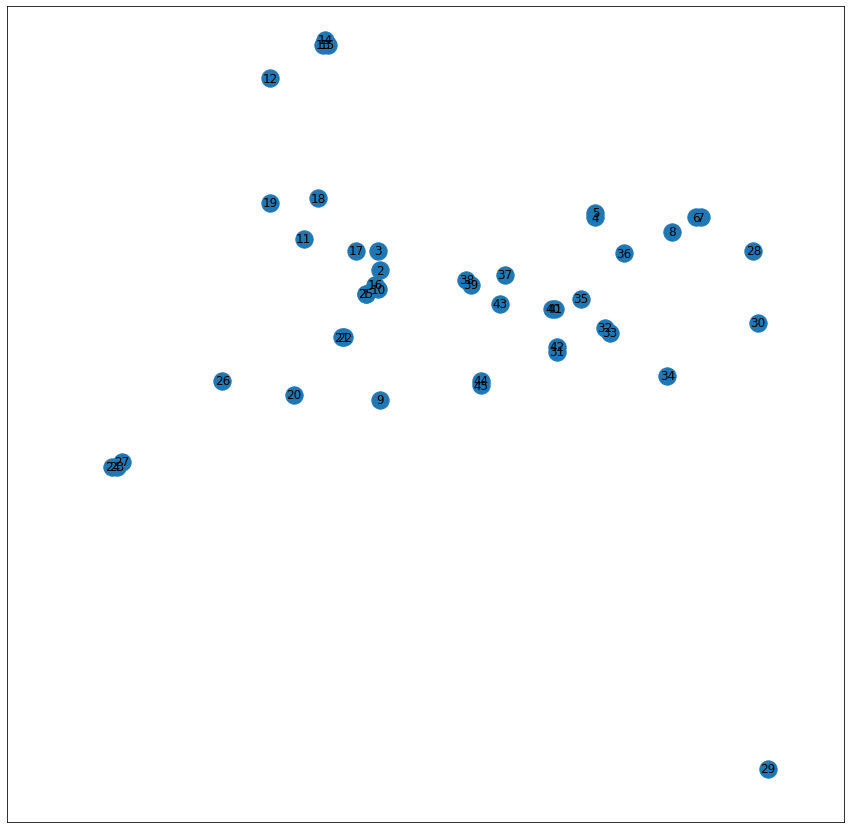

In [26]:
showNodes(manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

Testing the annealing process with the larger example. The steps are the same as the ones you had to comment in Question 4. Look at the additional step *plot_learning*, it shows the value of the fitness function as the annealing process occurs.  Run it multiple times, it is a probabilistic approach, so the result might be slightly different each time.

Solution ['16', '10', '25', '1', '2', '3', '17', '11', '18', '19', '12', '13', '15', '14', '38', '39', '43', '37', '40', '41', '35', '32', '33', '42', '31', '44', '45', '9', '22', '21', '20', '26', '27', '23', '24', '4', '5', '36', '8', '6', '7', '28', '30', '34', '29'] takes a total of 595.258


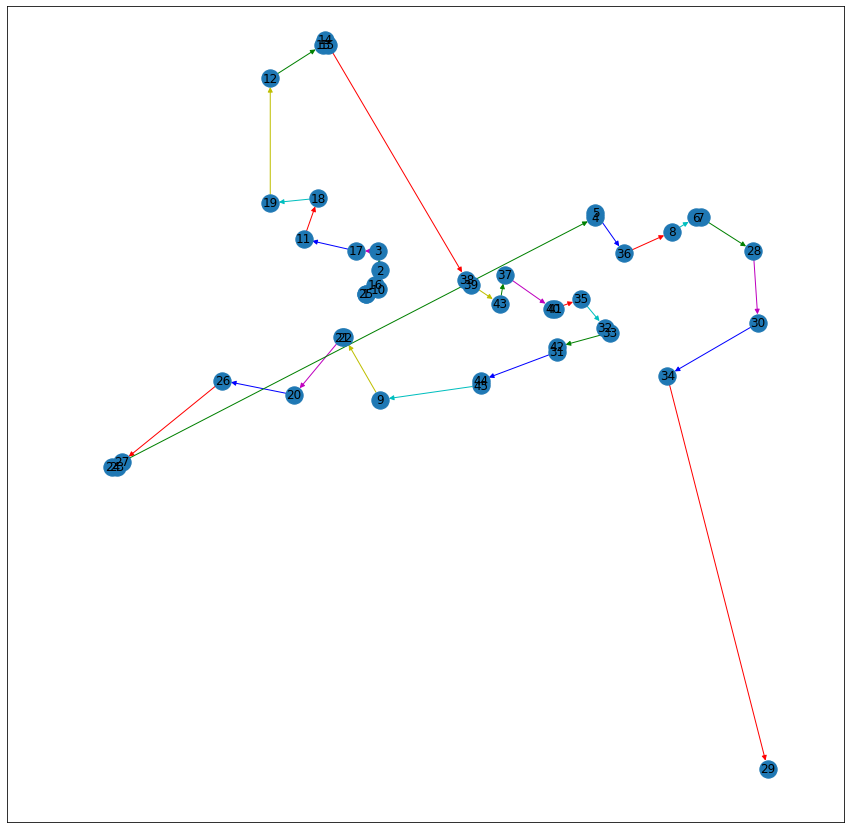

6.708203932499369
1e-08
Best fitness obtained:  534.375
Improvement over greedy solution:  0.1025


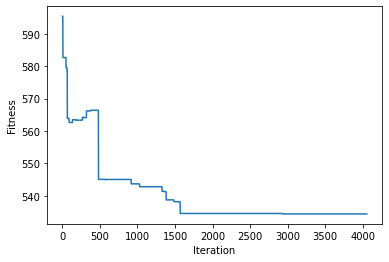

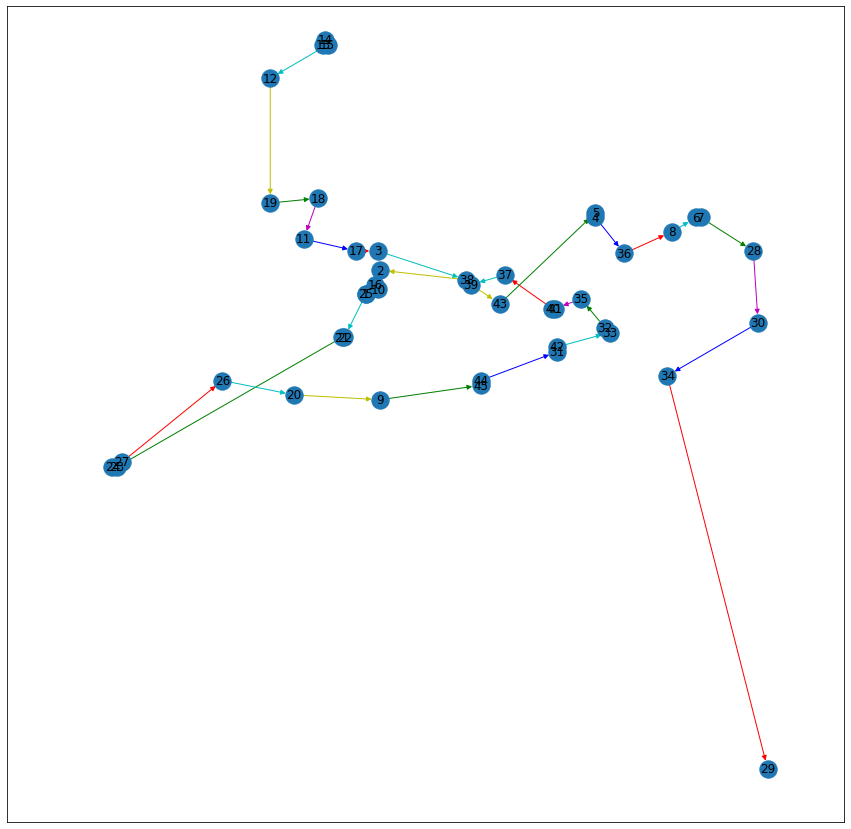

['3', '2', '16']
['16']
['10', '25', '1']
['25', '10', '3']
['10', '3', '22']
['21', '10', '9']
['10', '9', '20']
['20']
['26', '10', '11']
['3', '38', '11']
['18', '19', '3']
['18']
['19', '12', '13']
['13', '15', '14']
['13']
['14']
['19', '38', '39']
['26', '38', '39']
['38']
['37', '43', '40']
['43']
['40', '41', '42']
['41']
['35', '42', '31']
['31']
['32', '33', '35']
['32', '35', '34']
['35', '36', '34']
['30', '35', '36']
['36']
['4', '5', '8']
['6', '7', '4']
['7']
['28']
['30']
['4', '5', '44']
['4', '44', '45']
['45']
['4']
['26']
['27']
['23', '24', '29']
['23']
['24']
Solution ['17', '2', '16', '1', '25', '22', '21', '9', '20', '10', '11', '3', '18', '12', '15', '13', '14', '19', '39', '38', '37', '43', '40', '41', '42', '31', '33', '32', '34', '35', '36', '8', '6', '7', '28', '30', '5', '44', '45', '4', '26', '27', '29', '23', '24'] takes a total of 947.582


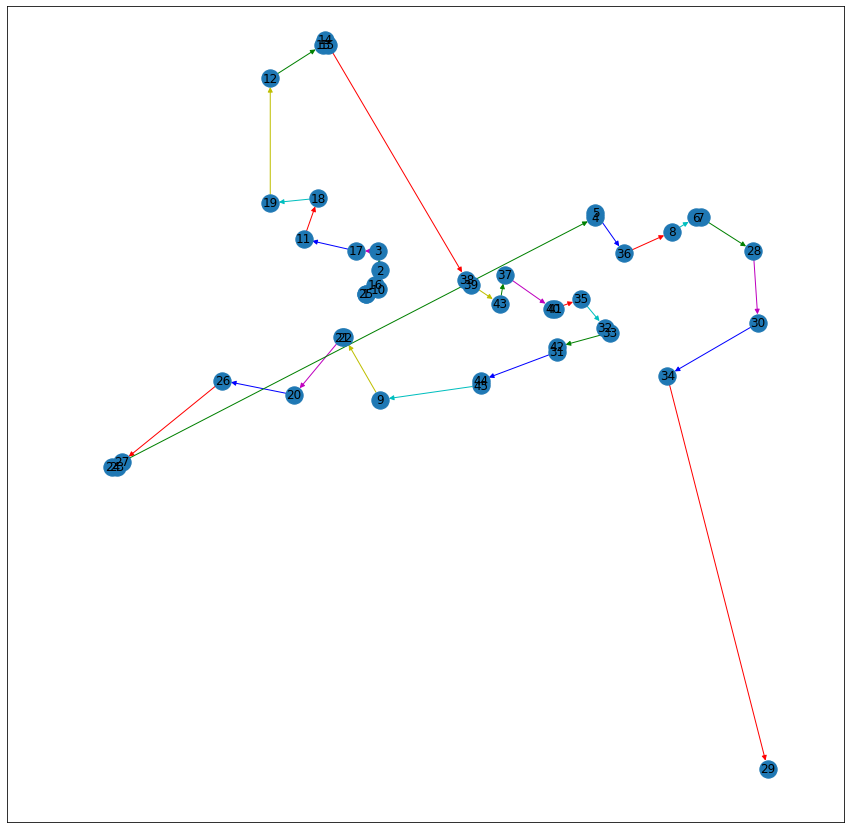

['33', '35', '42', '31']
['42', '41', '40', '33']
['41']
['40', '35', '43', '33']
['40']
['43', '37', '33', '39']
['34', '36', '43', '4']
['37']
['39', '38', '4', '44']
['38']
['2', '10', '16', '3']
['2', '17', '16', '10']
['2']
['16', '10', '25', '1']
['25']
['10', '16', '22', '21']
['10']
['22', '21', '11', '18']
['21', '9', '20', '11']
['9']
['20', '45', '44', '26']
['26']
['27', '23', '24', '11']
['23']
['27', '11', '19', '18']
['11', '19', '18', '45']
['18', '19', '12', '13']
['13', '15', '14', '19']
['13']
['14', '18', '19', '5']
['19', '14', '44', '45']
['14']
['5', '4', '36', '44']
['5', '36', '8', '6']
['36']
['8', '6', '7', '28']
['6']
['8']
['28', '30', '34', '44']
['30', '28', '44', '45']
['28', '44', '45', '29']
['44', '45', '29']
['45', '29']
['29']
6.708203932499369
1e-08
Best fitness obtained:  517.557
Improvement over random step solution:  0.2993


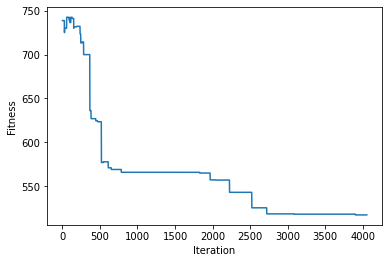

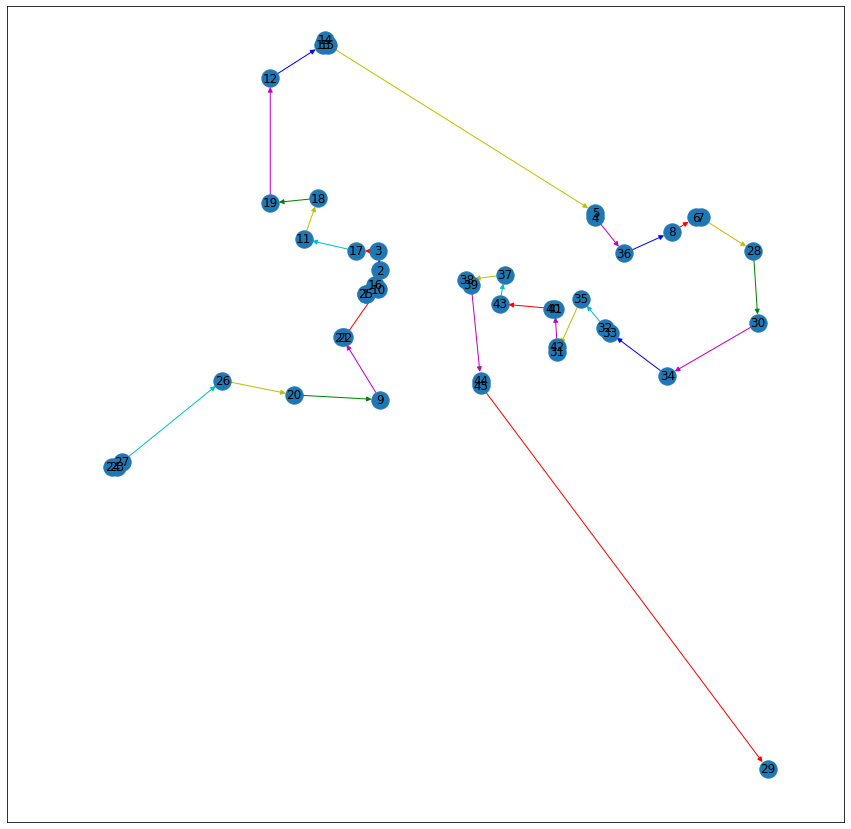

In [27]:
firstSol = greedy_solution(manyCities)
distances = distDict(manyCities)
print('Solution {} takes a total of {}'.format(firstSol,totalDist(firstSol, distances)))
showPath(firstSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

sa = SimAnneal(manyCities, False)
betterSol = sa.anneal()
sa.plot_learning()
showPath(betterSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

secondSol = random_step(manyCities, 3)
print('Solution {} takes a total of {}'.format(secondSol,totalDist(secondSol, distances)))
showPath(firstSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

sa2 = SimAnneal(manyCities, True, 4)
betterSol2 = sa2.anneal()
sa2.plot_learning()
showPath(betterSol2, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

**(TO DO) Q8 - 5 marks**   
As we've seen in the video lectures, and performed in question 6, evaluation of algorithms which include a random component should be performed by averaging a series of runs.  Define and perform some tests in which you will compare, on the large example (manyCities) the three algorithms explored in this notebook: greedy search, random step, simulated annealing.  For simulated annealing, test at least 2 configurations (which you saw as you commented the code in Q7).  Following your tests, discuss the results.

Greedy Tests


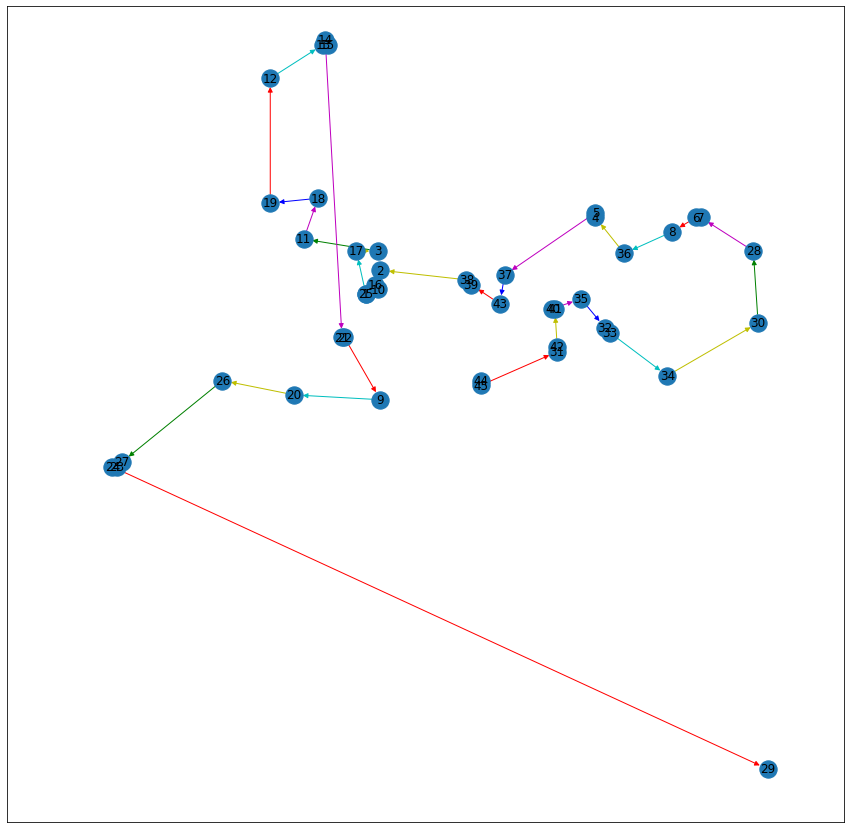

Total distance for Greedy Algorithm test 1: 580.572


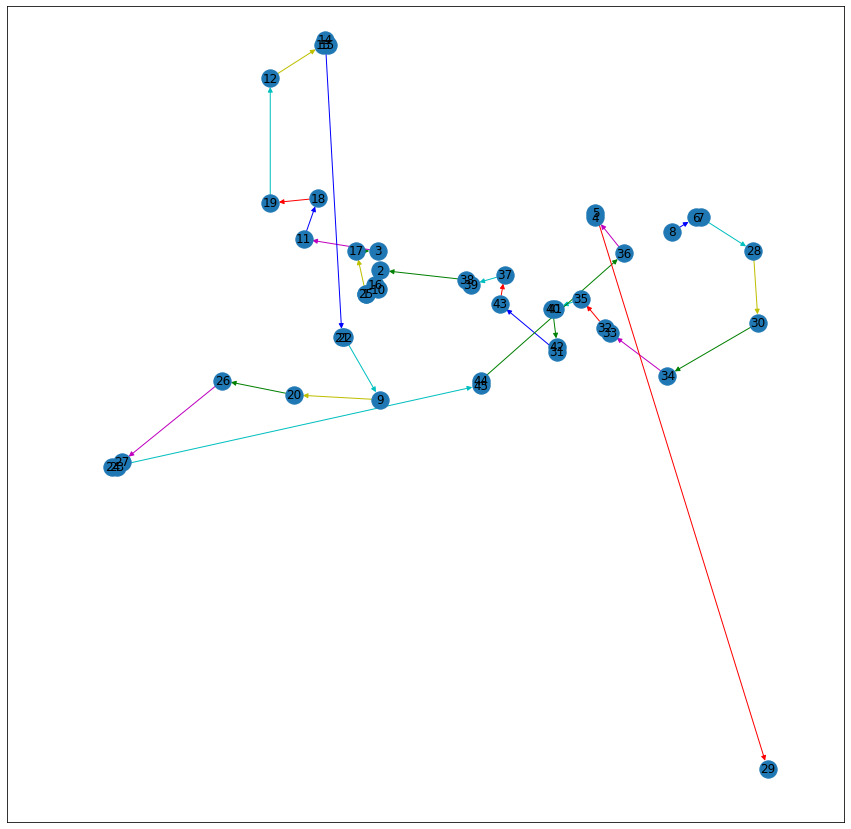

Total distance for Greedy Algorithm test 2: 633.931


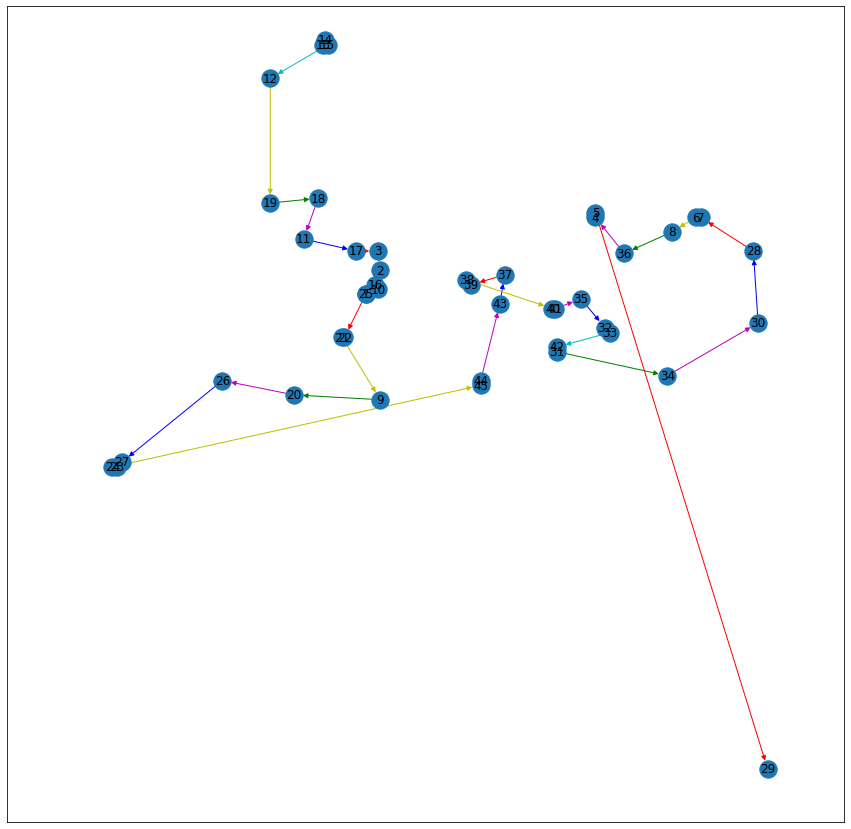

Total distance for Greedy Algorithm test 3: 557.946


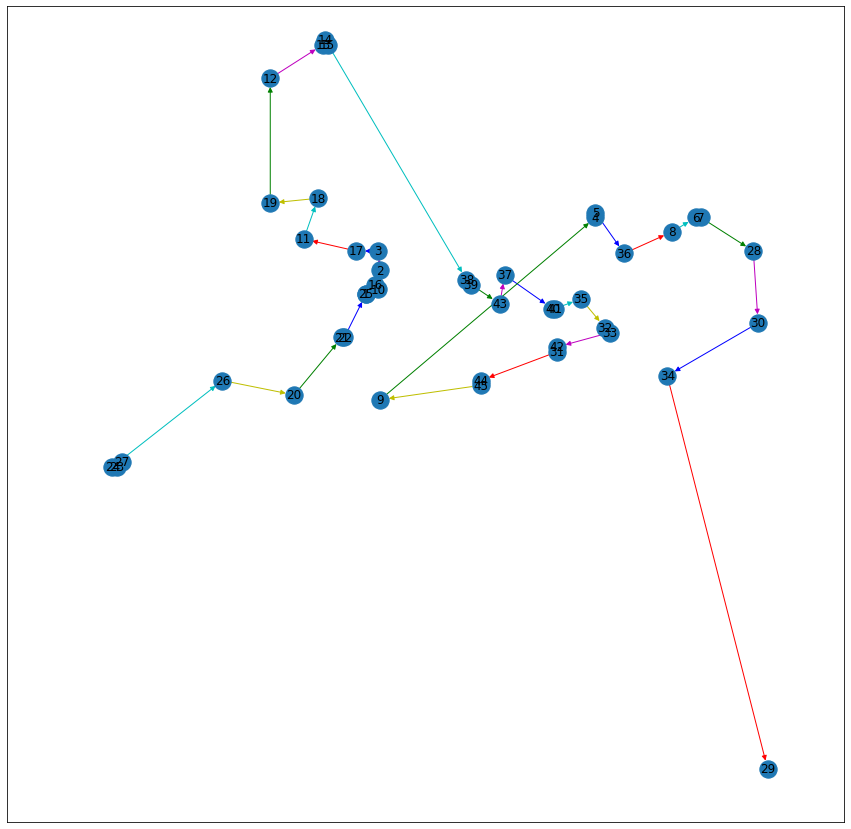

Total distance for Greedy Algorithm test 4: 535.128


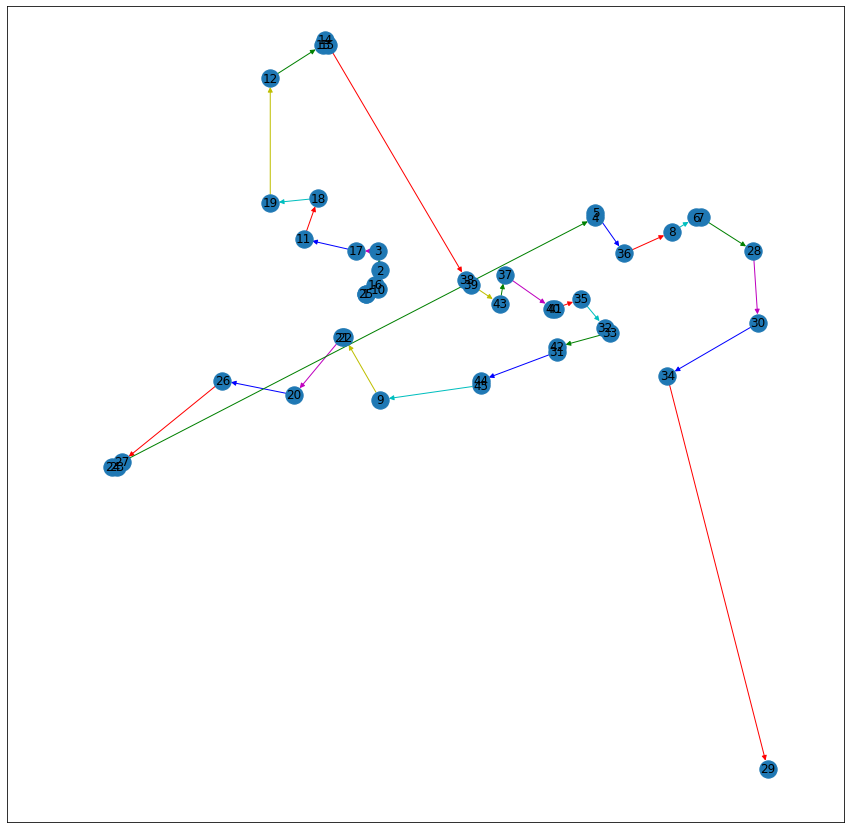

Total distance for Greedy Algorithm test 5: 592.589


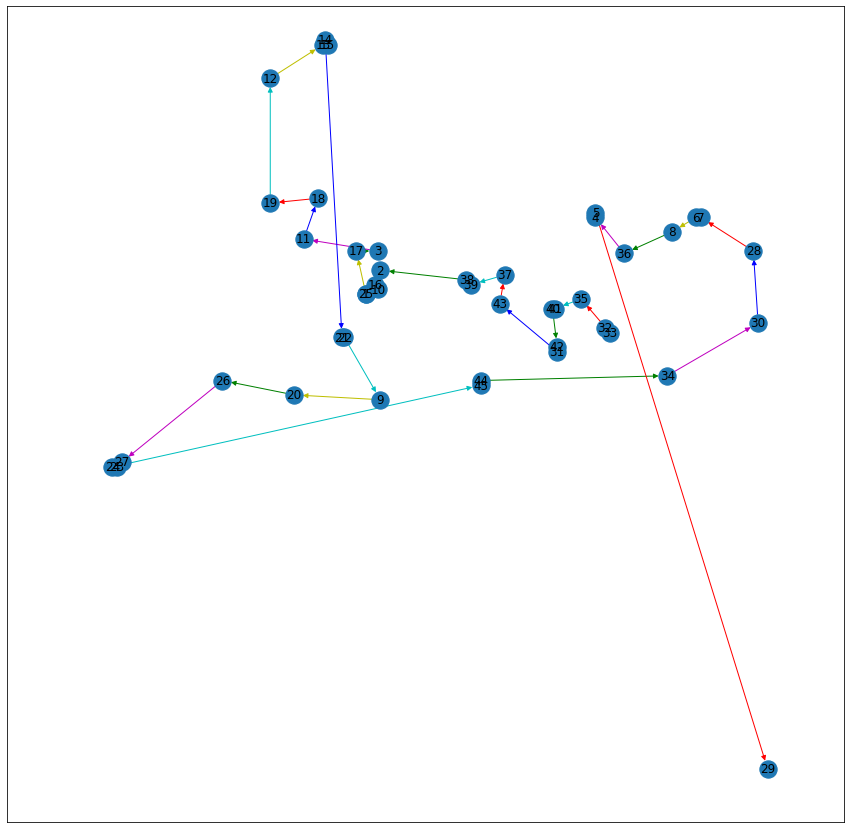

Total distance for Greedy Algorithm test 6: 630.292


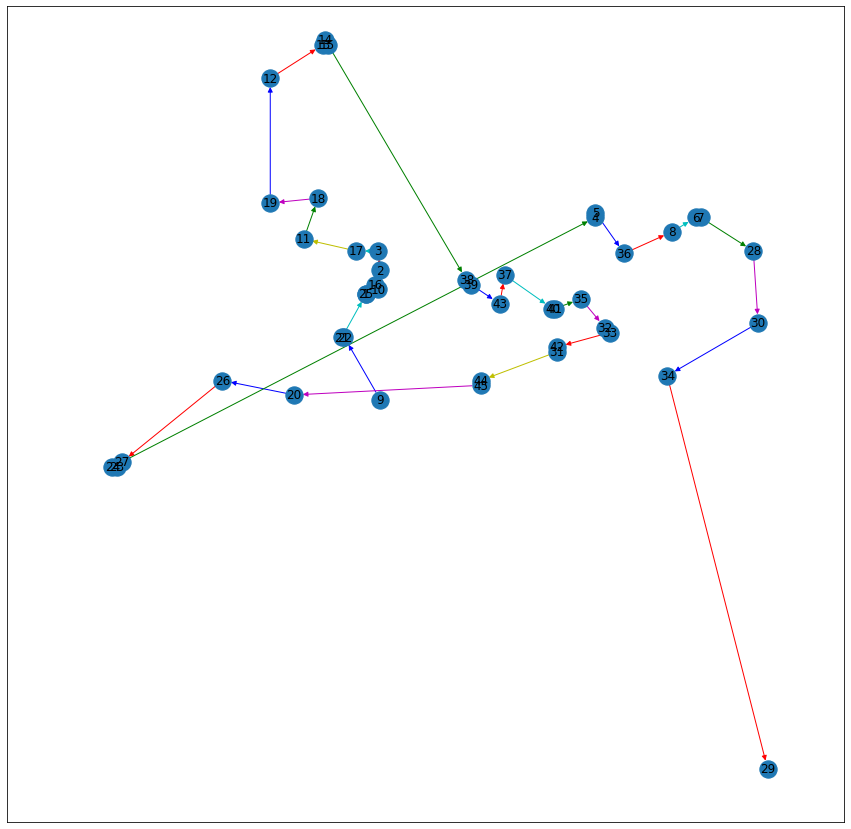

Total distance for Greedy Algorithm test 7: 605.103


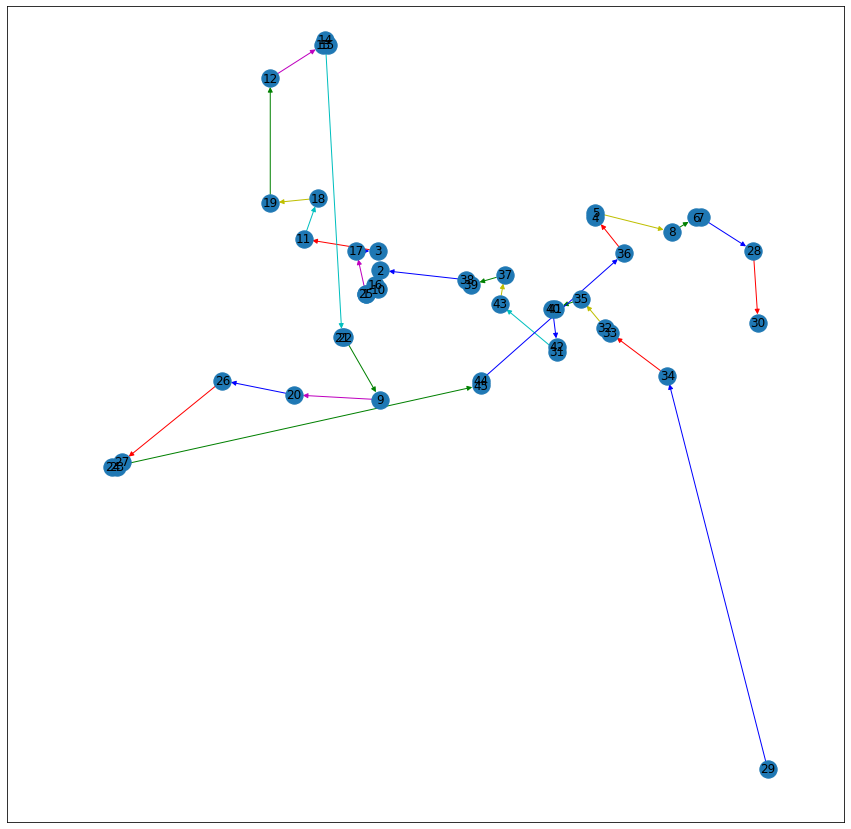

Total distance for Greedy Algorithm test 8: 591.657


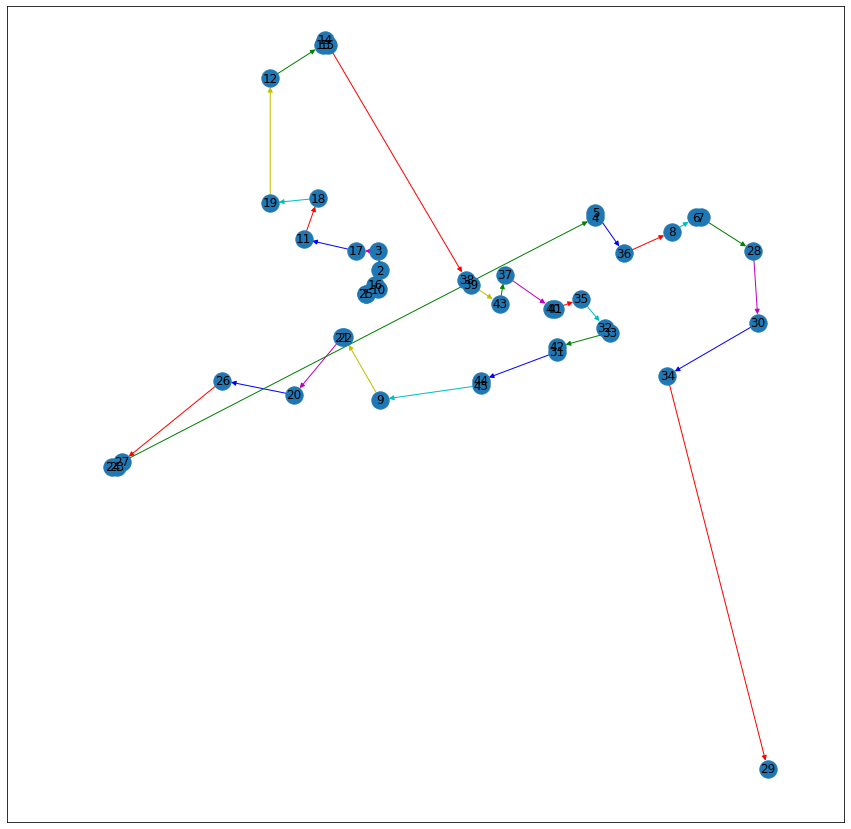

Total distance for Greedy Algorithm test 9: 595.39


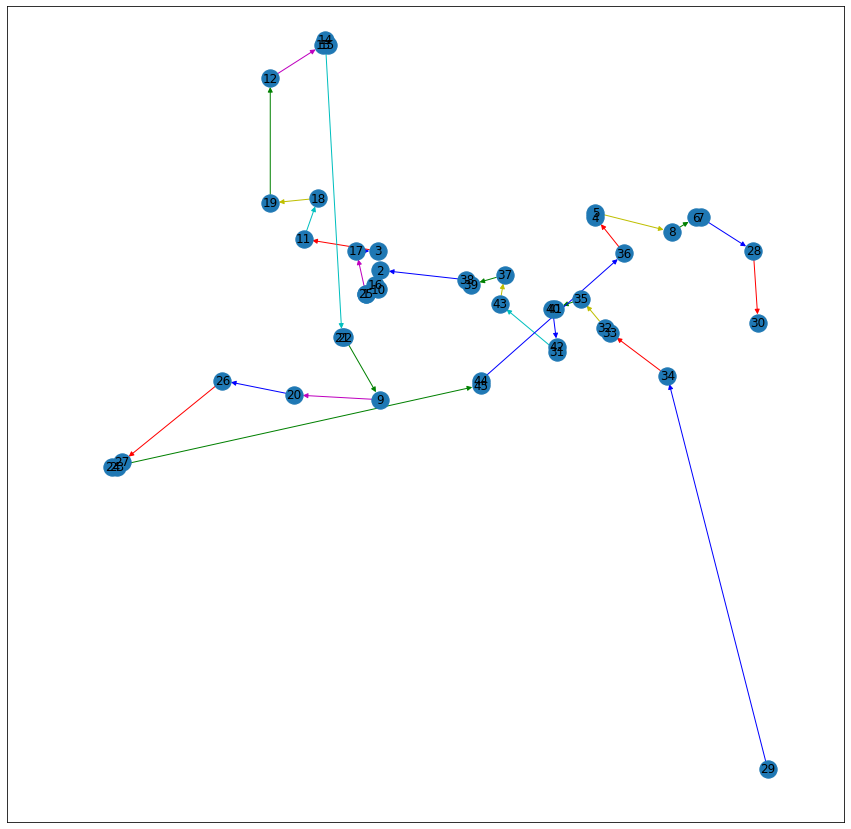

Total distance for Greedy Algorithm test 10: 591.657
Random Step Test
['44']
['43']
['37']
['39', '38', '40']
['41']
['35']
['32', '33', '42']
['31', '32', '33']
['32']
['31']
['39', '34', '38']
['39', '2', '10']
['16']
['10']
['25', '1', '3']
['25', '17', '3']
['3', '25', '11']
['18']
['19', '3', '25']
['3']
['22', '21', '39']
['22', '9', '20']
['22']
['20']
['26', '27', '23']
['23']
['24']
['26']
['19', '39', '12']
['12']
['13']
['15']
['14']
['39']
['4']
['5']
['36', '8', '6']
['6']
['7', '28', '36']
['7']
['28', '30', '34']
['30']
['34']
['29']


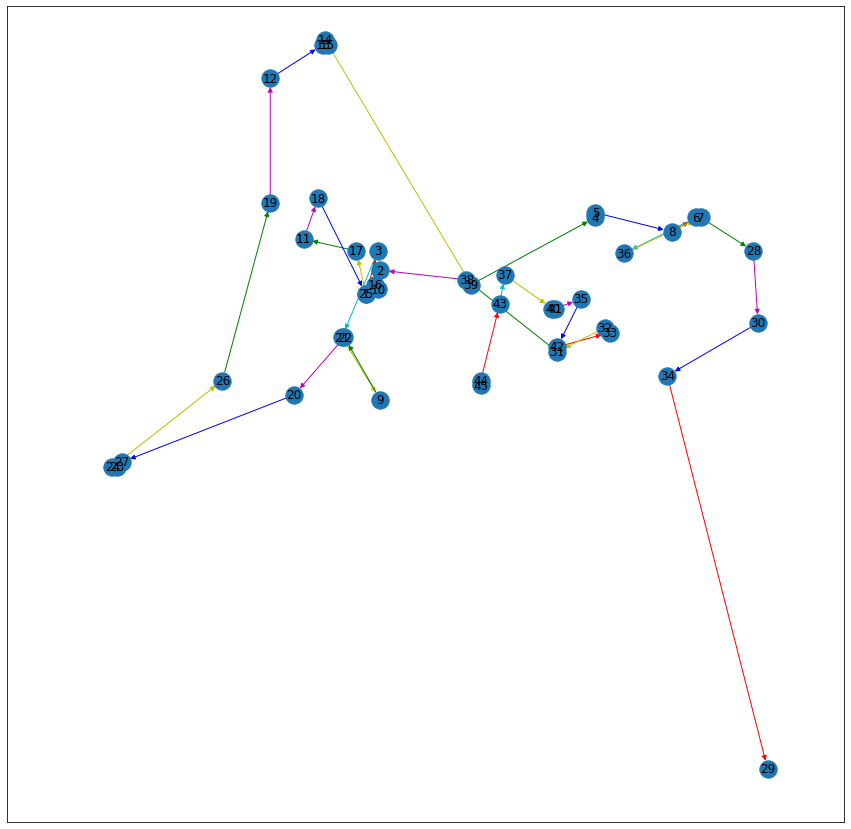

Total distance for random step with k=3 test 1: 684.636
['2']
['16']
['10']
['25', '1', '17']
['25', '1', '11']
['25']
['22', '21', '11']
['18', '19', '21']
['19', '12', '21']
['13', '15', '14']
['13', '14', '19']
['21']
['22']
['9']
['20', '45', '44']
['26']
['27', '23', '24']
['24']
['27', '45', '44']
['45']
['44']
['43', '31', '42']
['42']
['41', '40', '32']
['40', '35', '32']
['33', '35', '40']
['40', '33', '36']
['4']
['5', '8', '6']
['8', '6', '40']
['43']
['37', '39', '38']
['39']
['38']
['33']
['34']
['30', '8', '28']
['6']
['7']
['28']
['30', '14', '13']
['29']
['13']
['14']


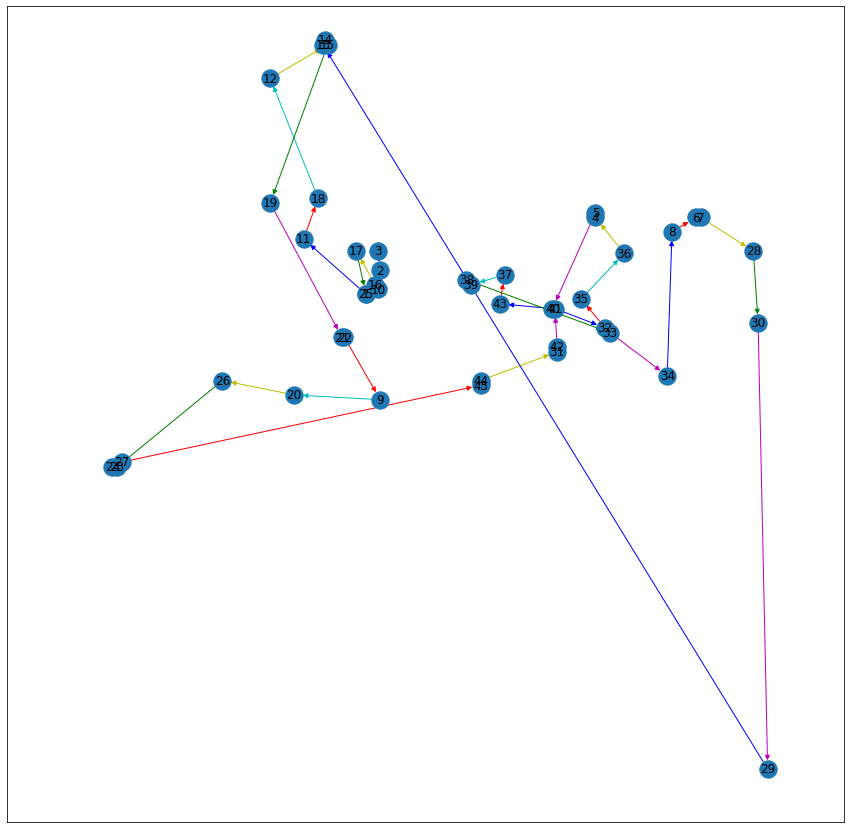

Total distance for random step with k=3 test 2: 818.911
['6']
['8', '28', '36']
['36']
['4', '5', '35']
['41']
['40', '42', '31']
['42', '40', '32']
['42']
['32', '33', '43']
['37']
['39', '38', '4']
['38']
['2', '10', '16']
['16', '25', '1']
['1']
['16', '2', '17']
['2']
['3']
['17', '11', '18']
['18']
['19', '17', '12']
['17', '12', '21']
['22', '9', '20']
['22']
['20', '17', '26']
['20', '27', '23']
['17', '27', '45']
['23']
['24', '17', '45']
['44', '45', '12']
['45']
['32']
['33']
['34', '4', '5']
['4']
['28', '34', '30']
['30']
['34', '29', '15']
['13']
['14']
['12', '24', '34']
['24', '34', '29']
['29']
['24']


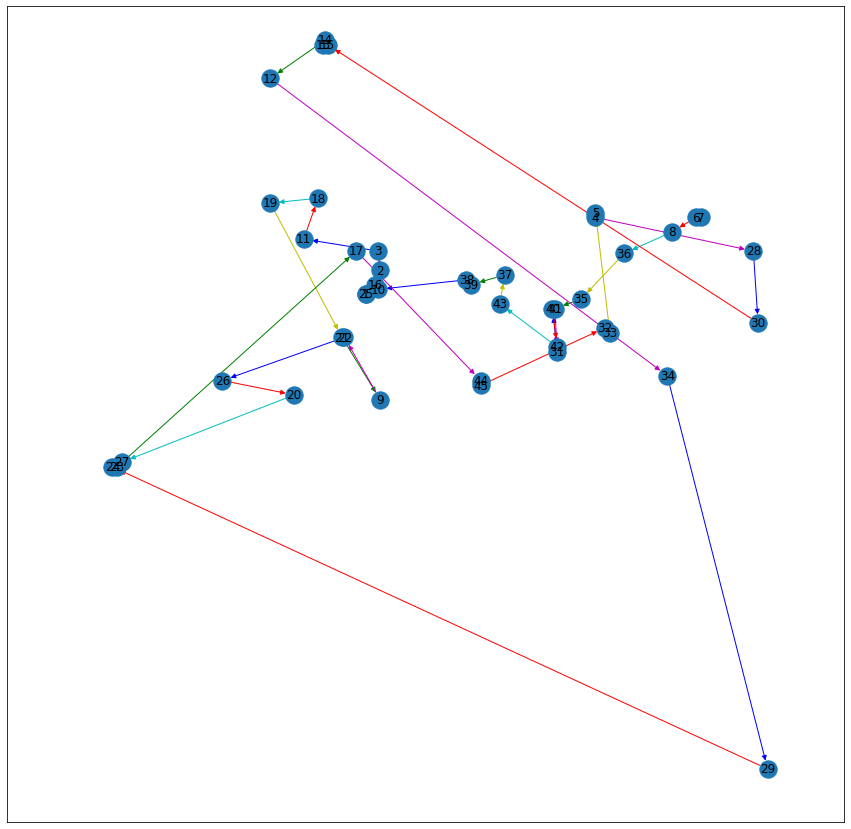

Total distance for random step with k=3 test 3: 976.132
['22']
['21', '1', '25']
['1']
['25', '10', '16']
['10', '16', '2']
['10', '2', '3']
['3', '10', '17']
['3', '10', '11']
['10']
['38', '11', '39']
['18', '19', '20']
['26']
['27']
['23']
['24', '19', '18']
['19', '12', '13']
['12']
['13', '15', '14']
['15', '14', '38']
['14', '38', '39']
['39']
['43']
['37', '40', '41']
['40']
['35']
['32', '33', '42']
['32', '42', '31']
['42', '32', '44']
['42', '36', '34']
['4', '5', '8']
['5', '8', '6']
['6', '7', '5']
['7', '28', '5']
['7']
['5']
['37', '42', '34']
['42']
['44', '45', '34']
['44']
['34']
['30', '29', '14']
['29', '14', '24']
['24']
['29']


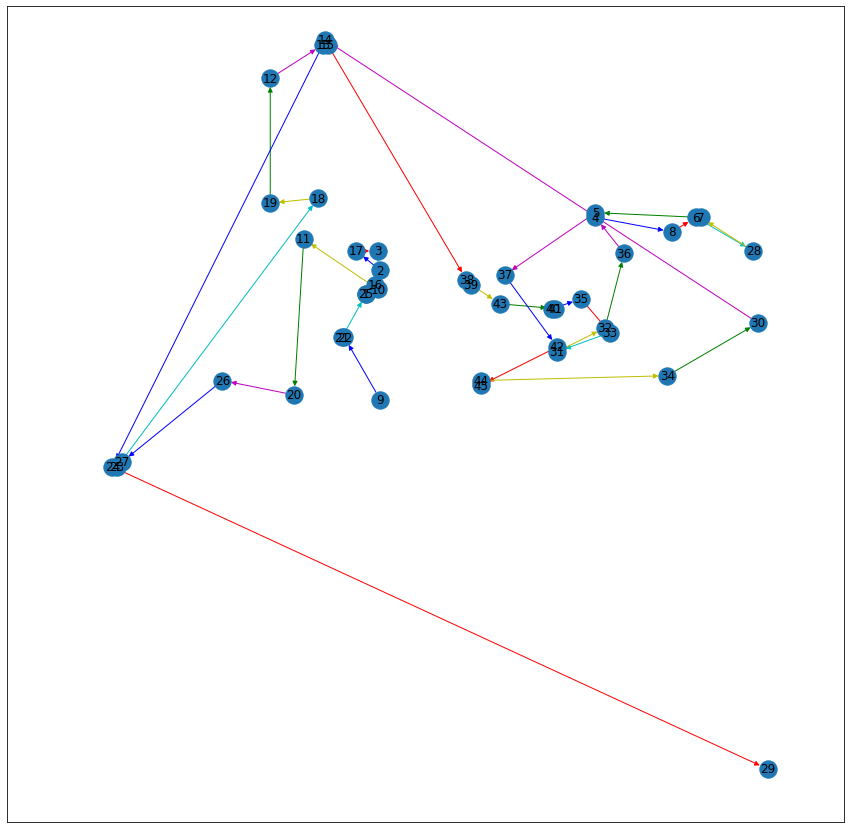

Total distance for random step with k=3 test 4: 958.323
['20', '21', '27']
['21']
['22']
['1', '25', '10']
['25']
['10', '16', '2']
['16', '2', '3']
['16', '3', '17']
['17', '16', '11']
['17']
['11']
['18', '19', '12']
['13']
['15']
['14', '18', '19']
['18']
['14', '38', '39']
['38', '39', '37']
['39']
['43', '37', '40']
['43']
['40', '41', '42']
['40']
['35', '42', '31']
['42']
['32', '35', '33']
['32']
['33', '36', '34']
['34']
['30', '36', '8']
['4']
['5', '8', '6']
['6', '7', '5']
['6', '28', '5']
['28']
['30']
['5']
['44']
['45']
['9', '27', '23']
['24']
['27']
['9']
['29']


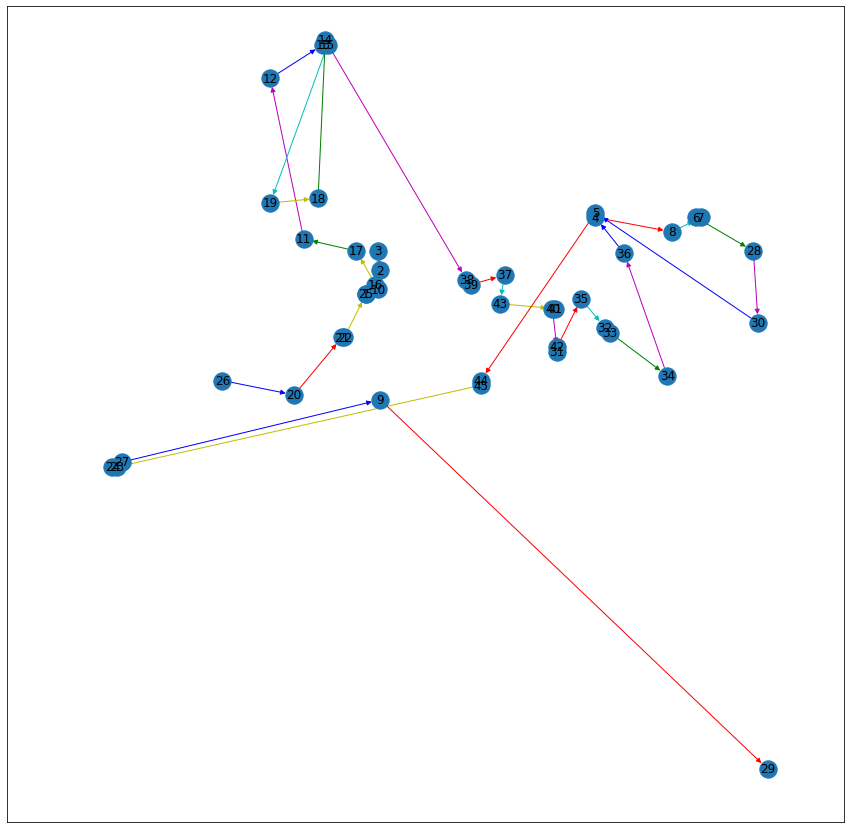

Total distance for random step with k=3 test 5: 757.856
['28', '34', '7']
['33']
['32', '35', '42']
['41', '40', '32']
['40', '42', '31']
['42']
['31', '32', '43']
['31']
['43']
['37']
['39']
['38']
['2', '10', '16']
['10']
['25', '1', '2']
['1']
['2', '17', '3']
['2', '17', '11']
['17']
['11']
['18']
['19', '12', '21']
['12', '21', '22']
['21', '9', '20']
['9', '20', '26']
['20']
['9', '27', '45']
['23']
['24']
['9']
['45', '44', '4']
['45', '36', '4']
['5', '36', '8']
['6', '7', '36']
['5', '6', '7']
['6', '7', '28']
['7', '6', '45']
['6']
['45', '15', '14']
['13', '14', '12']
['14', '12', '45']
['12', '45', '29']
['45']
['12']


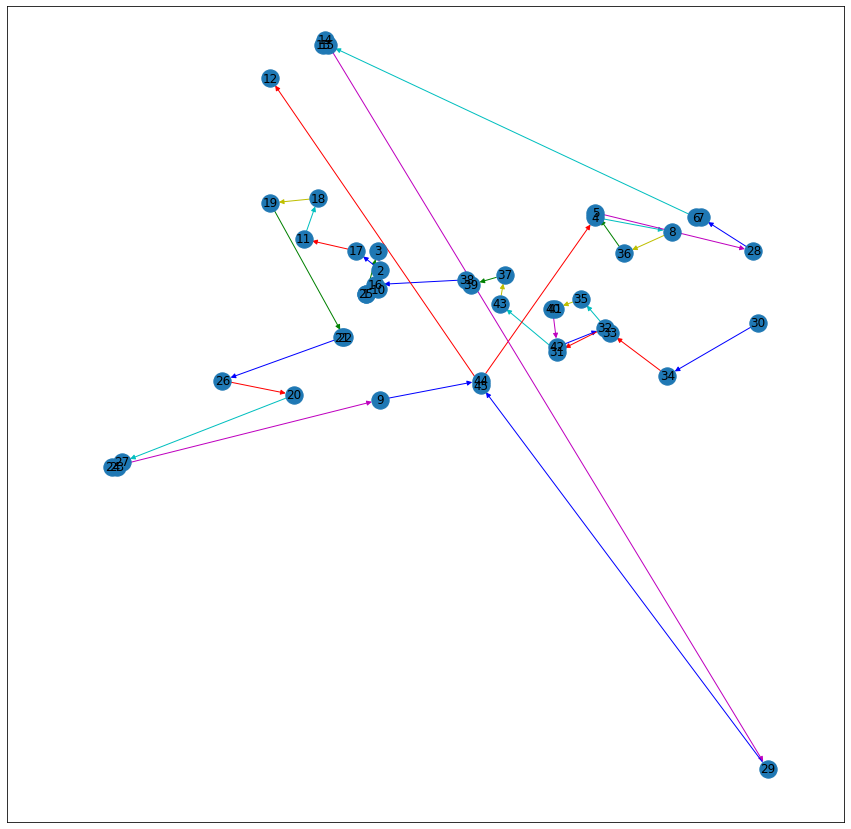

Total distance for random step with k=3 test 6: 950.388
['25', '10', '16']
['10']
['25', '2', '3']
['2', '17', '25']
['2', '25', '11']
['25']
['22']
['21']
['9']
['20', '45', '44']
['44', '31', '43']
['43', '31', '42']
['31']
['41']
['40', '35', '32']
['33', '35', '40']
['40', '33', '36']
['43', '37', '33']
['37']
['39', '38', '4']
['39', '4', '5']
['4']
['5', '36', '8']
['5', '8', '6']
['8']
['6', '7', '28']
['7', '28', '30']
['7']
['30']
['34', '33', '29']
['34']
['20']
['26', '11', '27']
['23', '24', '26']
['23']
['26', '11', '19']
['11', '19', '18']
['18', '19', '12']
['18', '12', '13']
['15']
['14']
['12', '18', '29']
['12', '29']
['29']


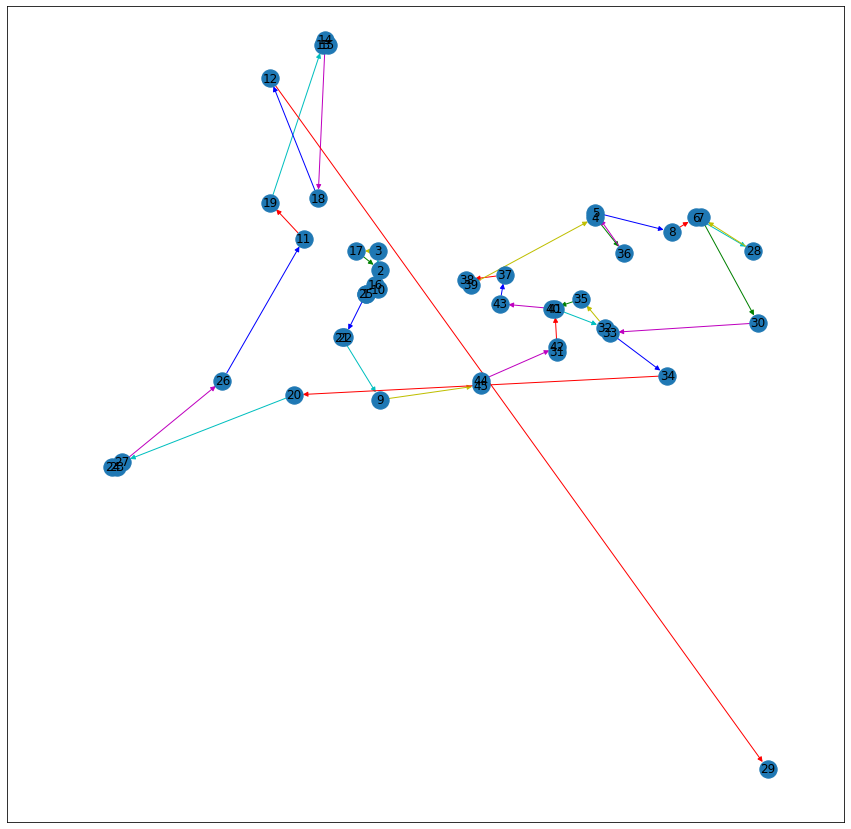

Total distance for random step with k=3 test 7: 793.276
['1', '10', '16']
['10']
['1']
['2']
['3']
['17', '11', '18']
['18', '19', '17']
['19']
['17', '12', '21']
['13', '15', '14']
['13']
['14']
['17', '38', '39']
['22']
['21']
['9', '20', '26']
['26']
['27']
['23', '24', '9']
['24', '9', '45']
['45']
['44', '31', '43']
['43']
['37']
['39']
['38', '40', '41']
['40', '35', '42']
['40', '32', '33']
['32', '42', '31']
['42']
['31', '40', '38']
['31']
['34', '38', '36']
['4', '5', '36']
['4']
['36', '8', '6']
['8', '6', '7']
['6']
['7']
['28', '30', '34']
['28']
['34', '29', '24']
['34']
['24']


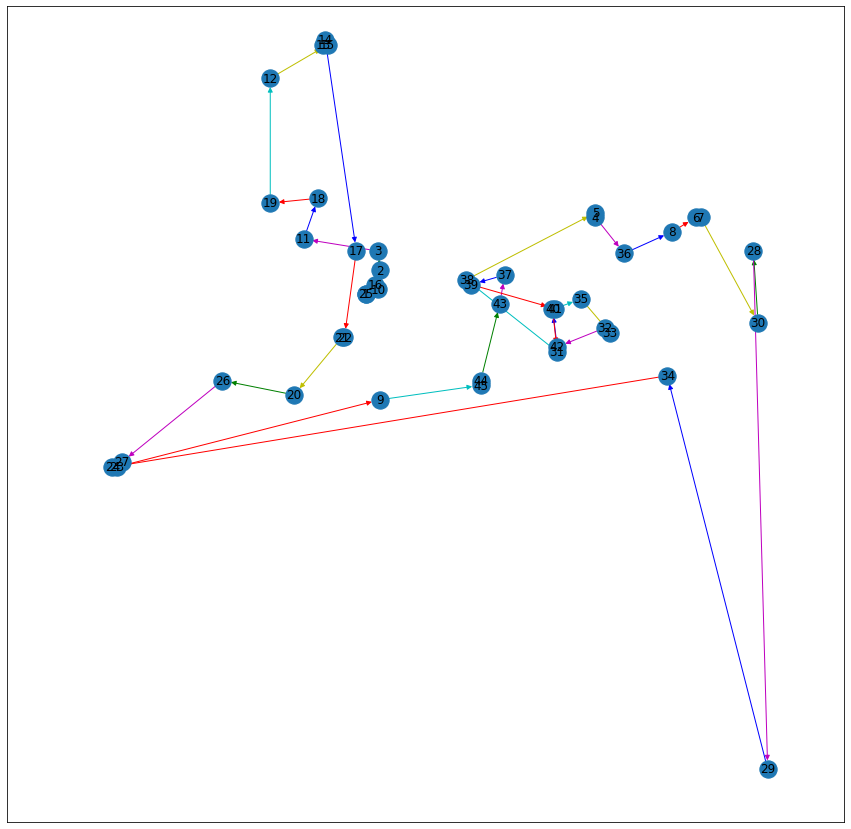

Total distance for random step with k=3 test 8: 820.514
['13']
['15']
['14', '18', '19']
['11', '19', '17']
['19']
['17']
['3', '2', '16']
['16']
['10', '25', '1']
['1']
['10']
['3']
['22']
['21', '9', '20']
['9', '20', '26']
['20', '27', '23']
['24', '27', '20']
['9', '27', '45']
['45']
['44', '31', '43']
['37']
['39']
['38']
['40']
['41']
['35']
['32']
['33', '42', '31']
['42', '33', '44']
['42', '33', '34']
['33']
['34']
['30']
['28']
['7', '6', '8']
['6', '7', '36']
['6', '36', '4']
['5']
['36', '6', '14']
['6']
['14']
['27']
['24']
['29']


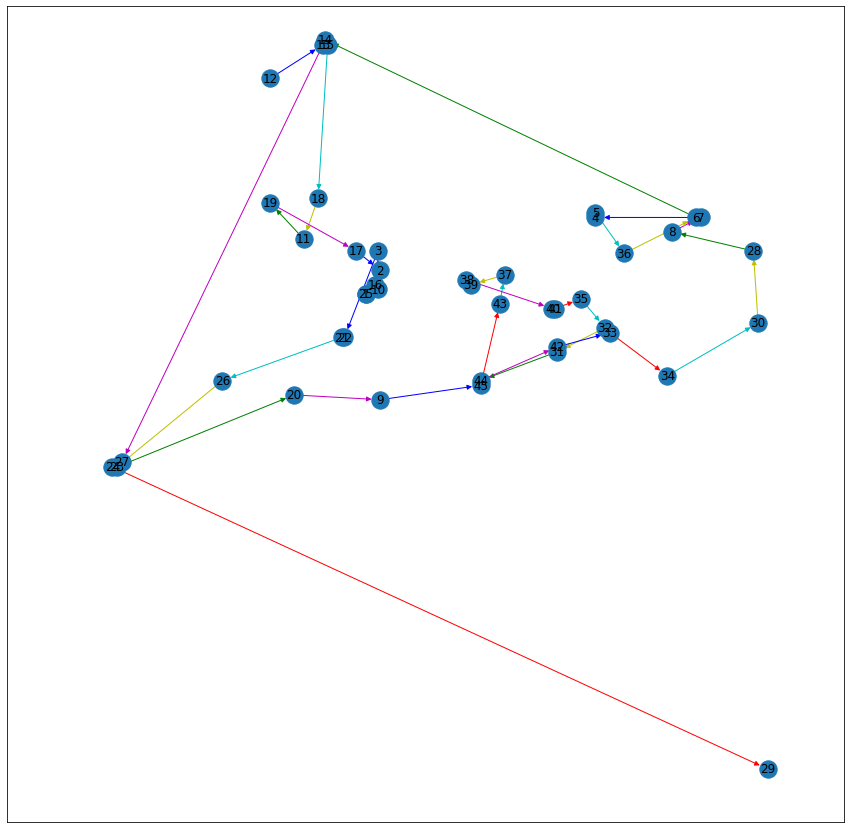

Total distance for random step with k=3 test 9: 848.504
['4']
['5', '8', '35']
['6']
['7']
['28']
['30']
['34']
['33', '32', '31']
['32', '35', '42']
['31', '41', '40']
['40', '35', '31']
['40', '32', '35']
['40', '32', '37']
['43']
['37']
['39']
['38', '2', '10']
['2']
['16', '3', '10']
['17', '16', '10']
['10', '25', '1']
['25', '10', '17']
['10']
['17']
['11']
['18', '19', '21']
['19', '12', '21']
['12', '21', '22']
['21', '9', '20']
['26']
['21', '27', '23']
['9', '44', '45']
['45']
['9', '32', '5']
['5']
['9']
['27', '23', '24']
['23']
['24']
['12']
['13']
['15']
['14', '29']
['29']


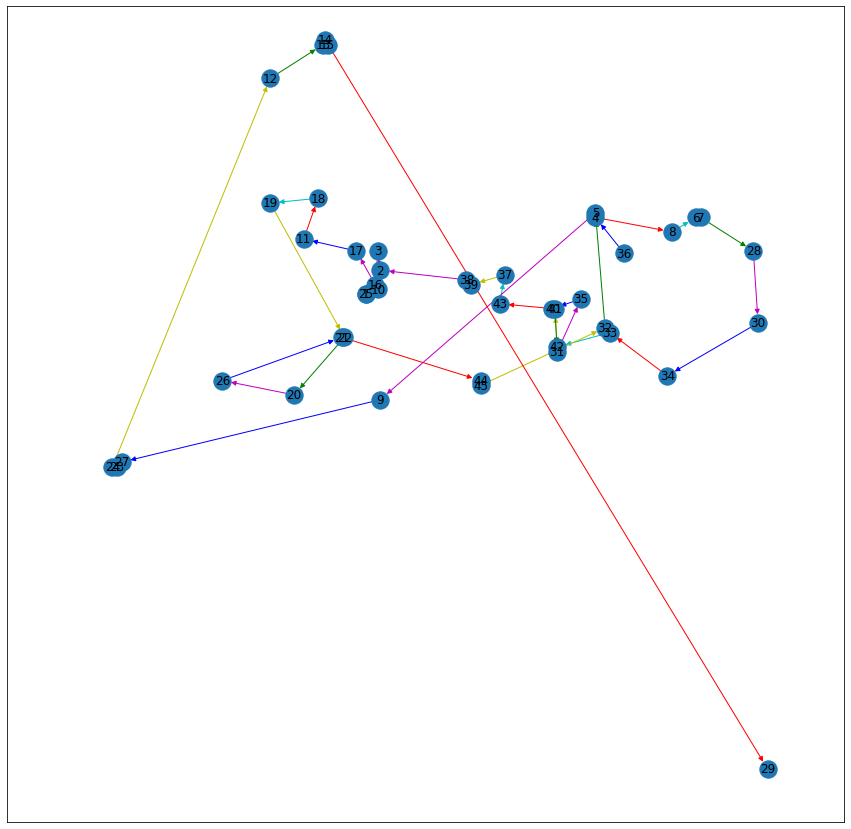

Total distance for random step with k=3 test 10: 816.571
Simulated Annealinf Configuration 1 Test
6.708203932499369
1e-08
Best fitness obtained:  522.803
Improvement over greedy solution:  0.1143


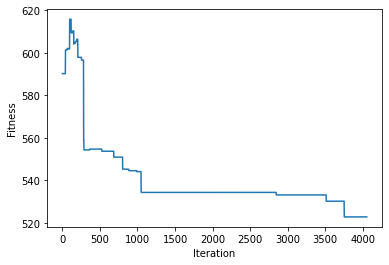

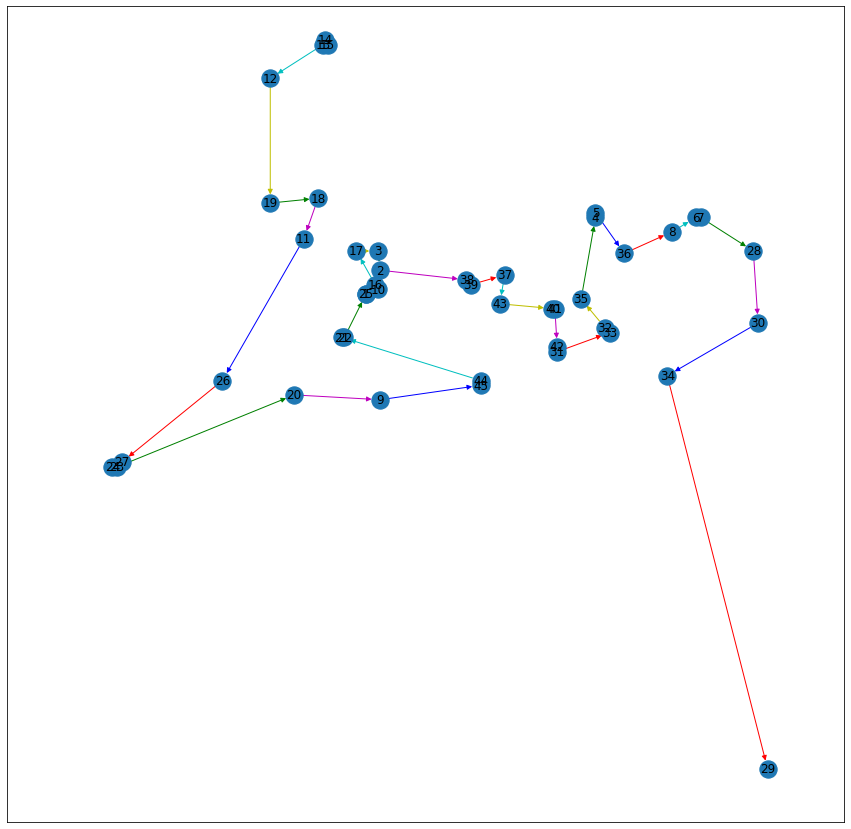

6.708203932499369
1e-08
Best fitness obtained:  513.283
Improvement over greedy solution:  0.0802


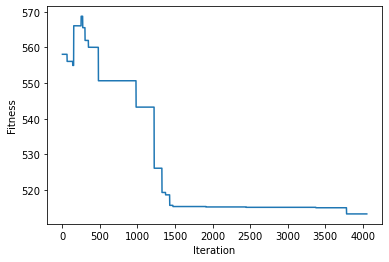

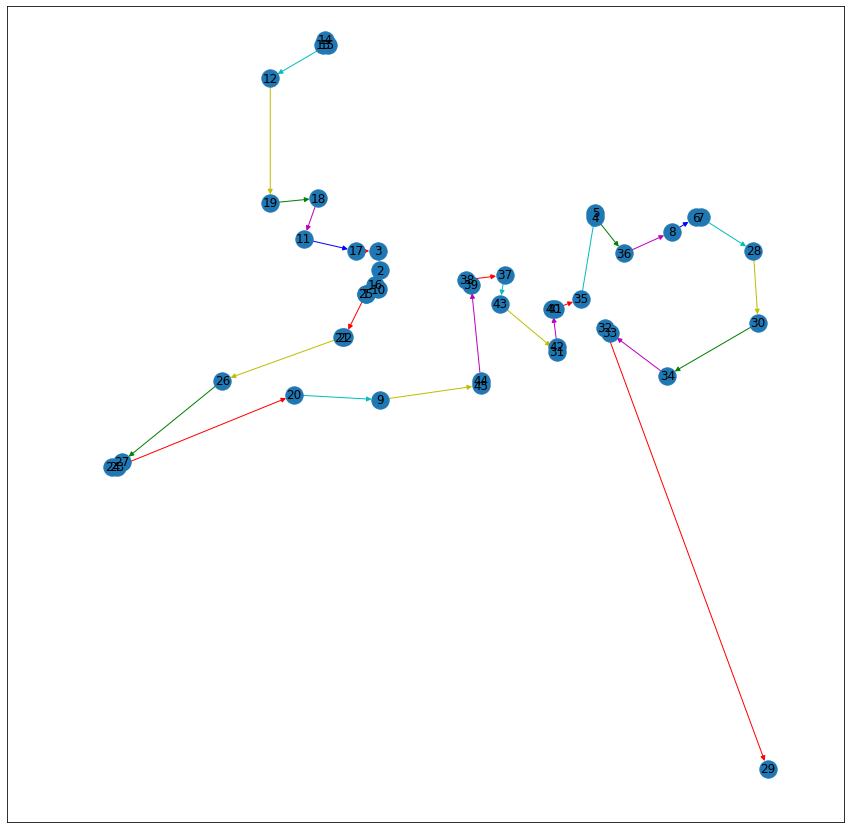

6.708203932499369
1e-08
Best fitness obtained:  495.833
Improvement over greedy solution:  0.1672


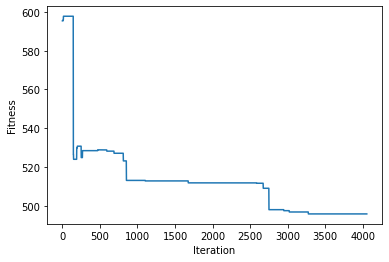

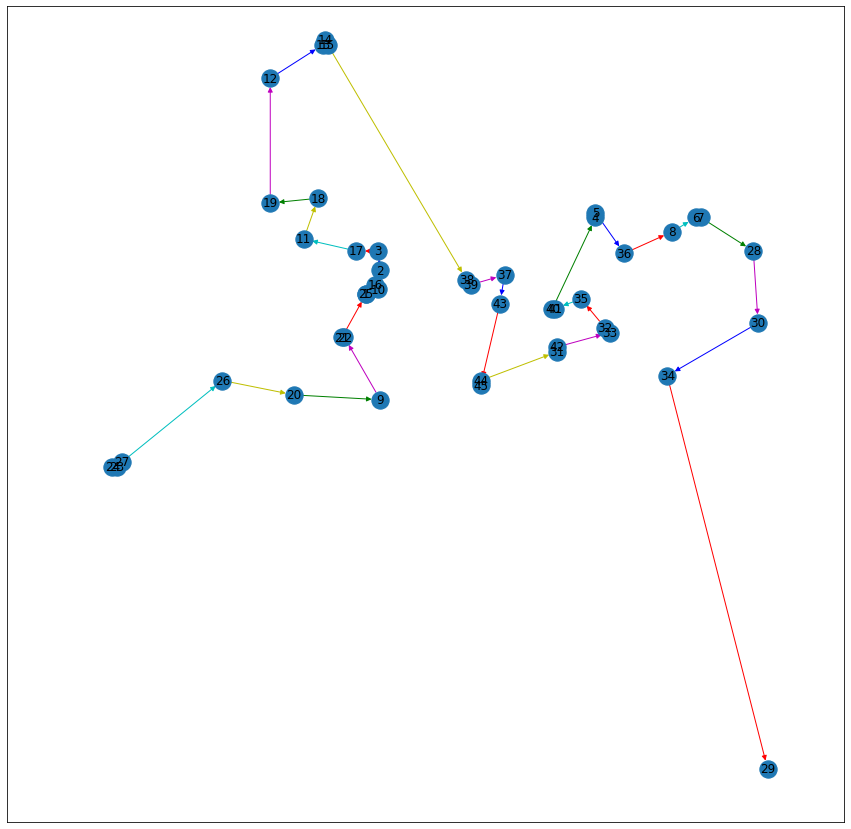

6.708203932499369
1e-08
Best fitness obtained:  516.649
Improvement over greedy solution:  0.1479


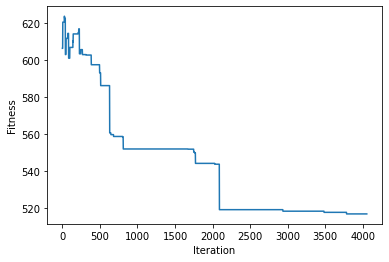

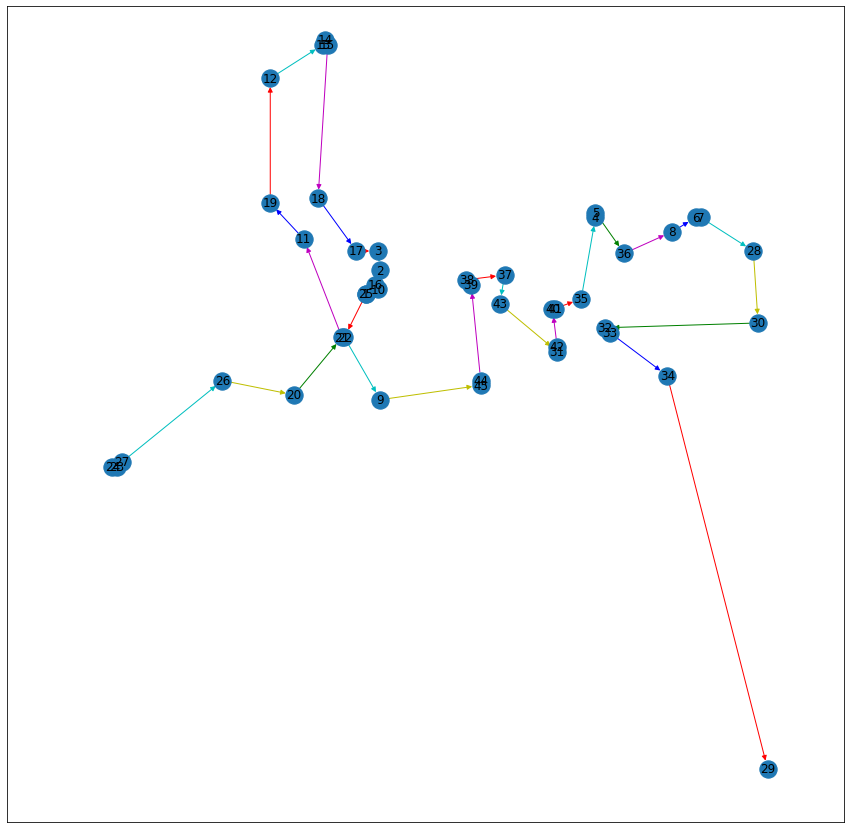

6.708203932499369
1e-08
Best fitness obtained:  516.463
Improvement over greedy solution:  0.0349


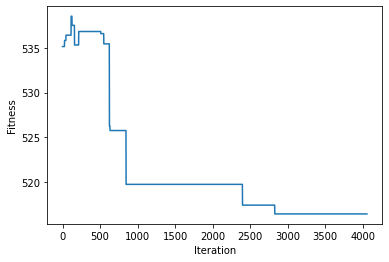

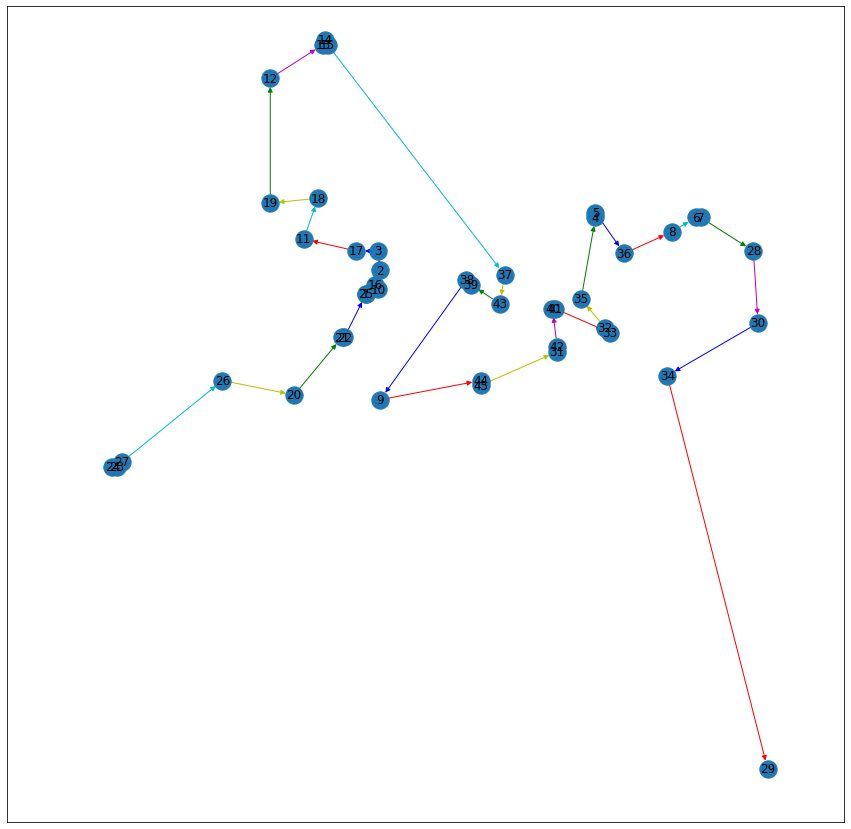

6.708203932499369
1e-08
Best fitness obtained:  523.778
Improvement over greedy solution:  0.1161


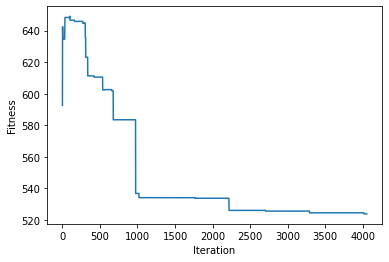

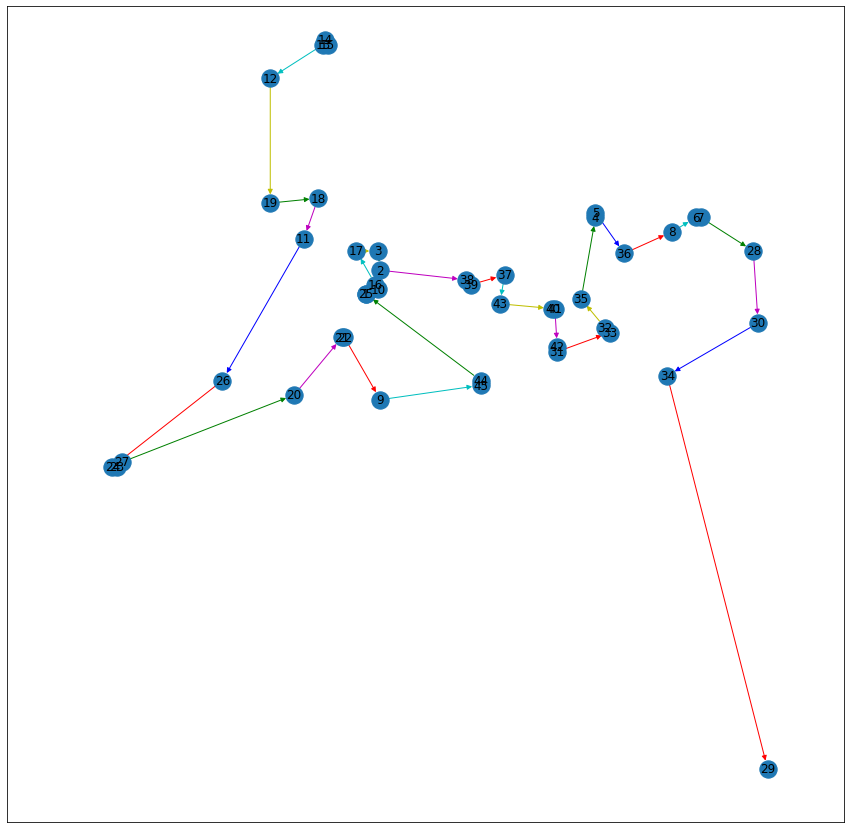

6.708203932499369
1e-08
Best fitness obtained:  534.779
Improvement over greedy solution:  0.1503


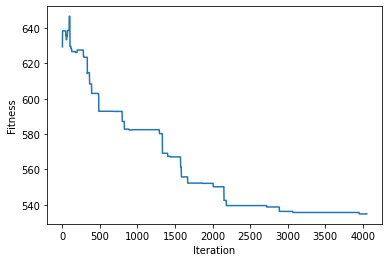

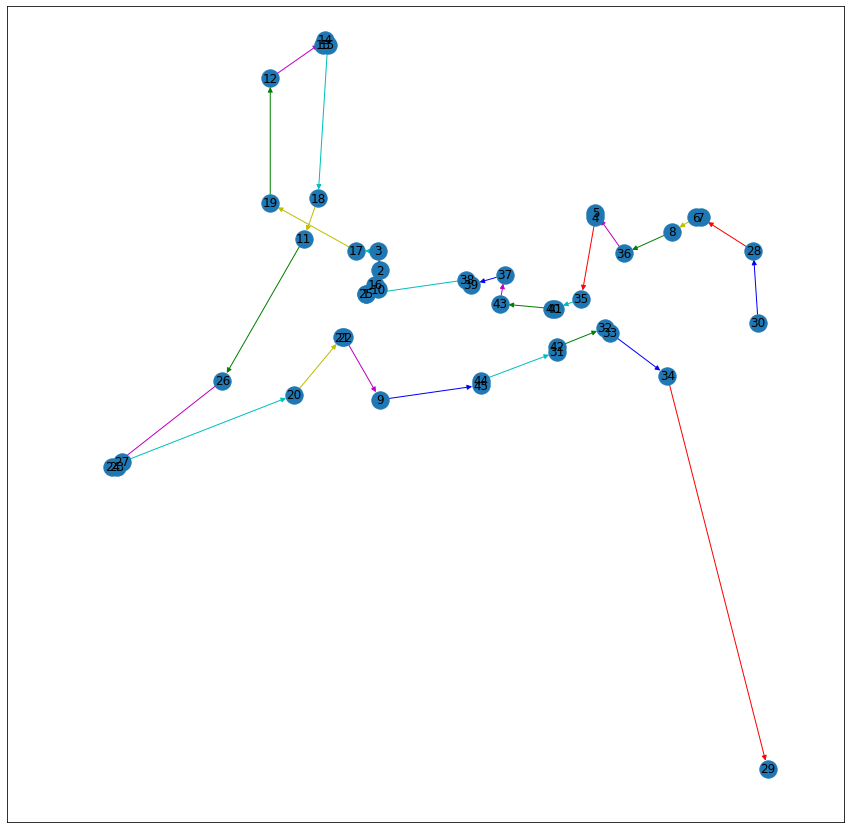

6.708203932499369
1e-08
Best fitness obtained:  515.012
Improvement over greedy solution:  0.1817


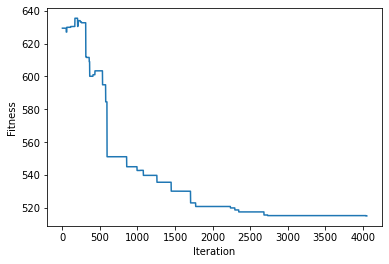

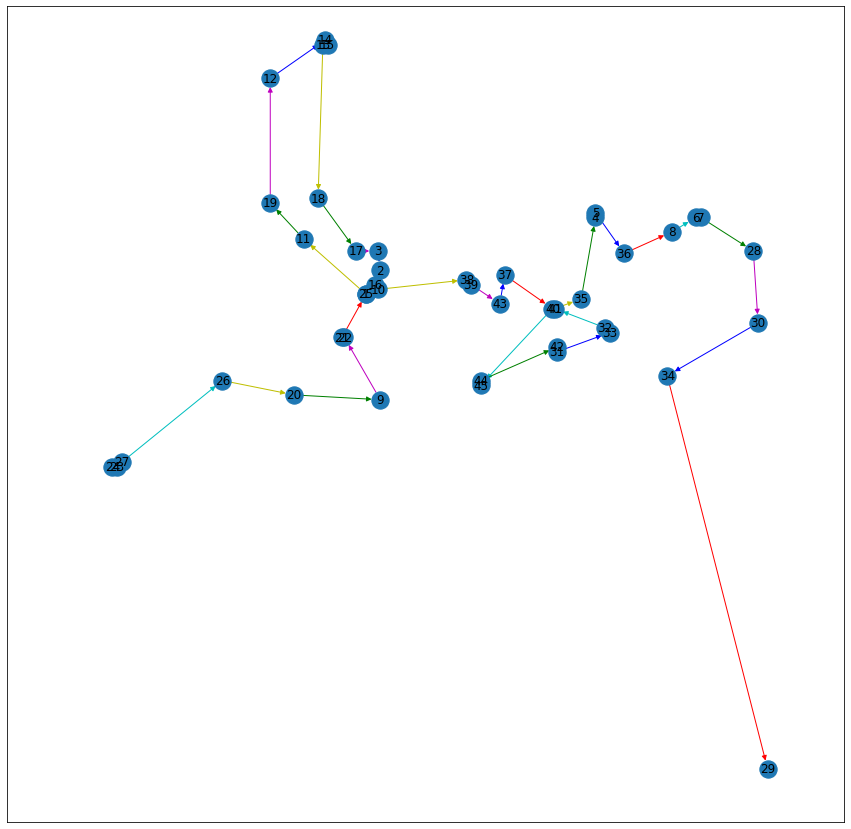

6.708203932499369
1e-08
Best fitness obtained:  512.745
Improvement over greedy solution:  0.0812


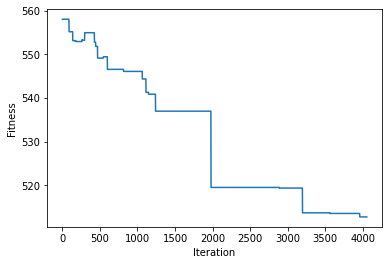

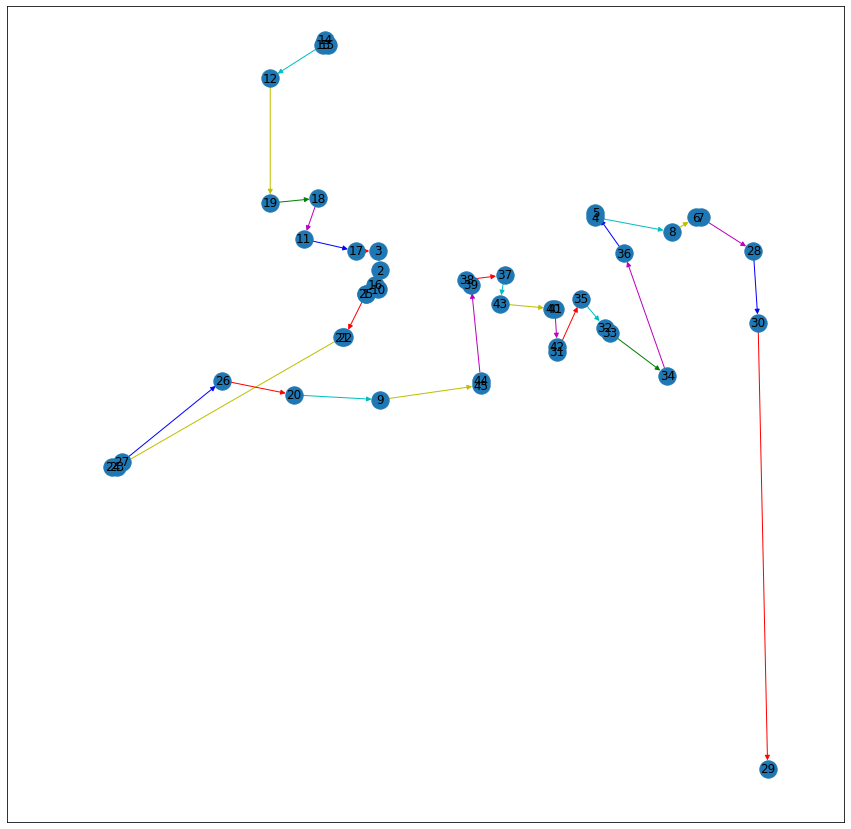

6.708203932499369
1e-08
Best fitness obtained:  526.389
Improvement over greedy solution:  0.1632


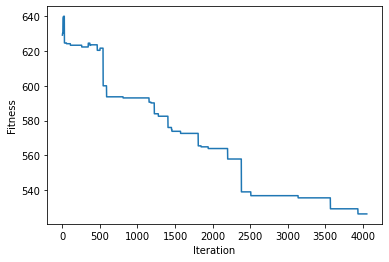

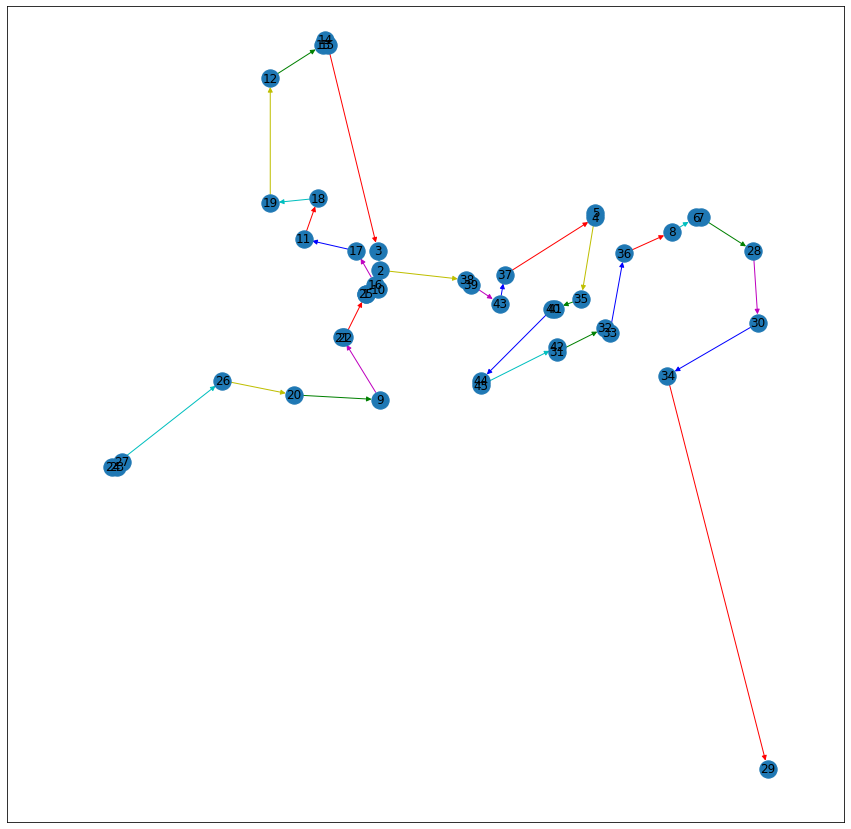

Simulated Annealinf Configuration 2 Test
['26']
['21', '27', '22']
['21', '1', '25']
['25', '10', '16']
['10', '16', '2']
['16']
['10']
['3']
['17']
['11']
['18']
['19', '12', '21']
['12', '21', '13']
['9', '38', '39']
['38']
['37', '43', '40']
['37', '40', '41']
['40', '35', '42']
['35', '42', '31']
['31']
['32', '33', '35']
['32', '35', '34']
['32']
['36', '34', '4']
['4', '5', '8']
['6']
['7', '28', '4']
['28', '4', '5']
['4']
['37', '28', '34']
['30']
['28']
['37', '44', '45']
['44']
['9']
['37']
['15', '13', '14']
['13', '15', '12']
['15']
['12']
['27', '23', '24']
['23', '27', '29']
['23', '29']
['29']
6.708203932499369
1e-08
Best fitness obtained:  539.726
Improvement over random step solution:  0.3233


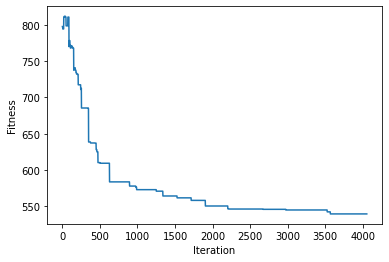

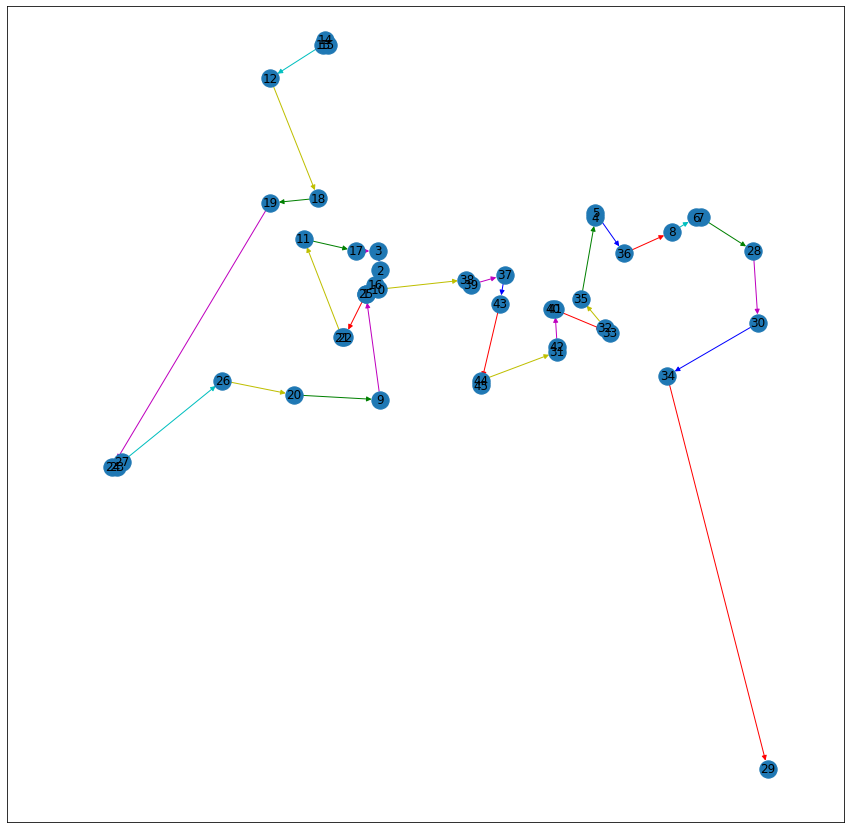

['32']
['35']
['41', '40', '42']
['40']
['42', '31', '43']
['42', '43', '44']
['45', '43', '42']
['43']
['37', '39', '38']
['39', '37', '2']
['16']
['10']
['25', '1', '3']
['17']
['25']
['1', '22', '21']
['21']
['1']
['11']
['18', '19', '20']
['19', '12', '13']
['13', '15', '14']
['15', '14', '19']
['15', '14', '26']
['15']
['39']
['37']
['42', '4', '5']
['5', '36', '8']
['36', '8', '6']
['7', '8', '28']
['7', '30', '8']
['34']
['42', '36', '8']
['8', '7', '42']
['7']
['42']
['9']
['20', '26', '27']
['23']
['24']
['26']
['20']
['29']
6.708203932499369
1e-08
Best fitness obtained:  510.695
Improvement over random step solution:  0.3495


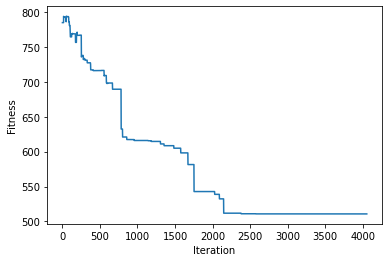

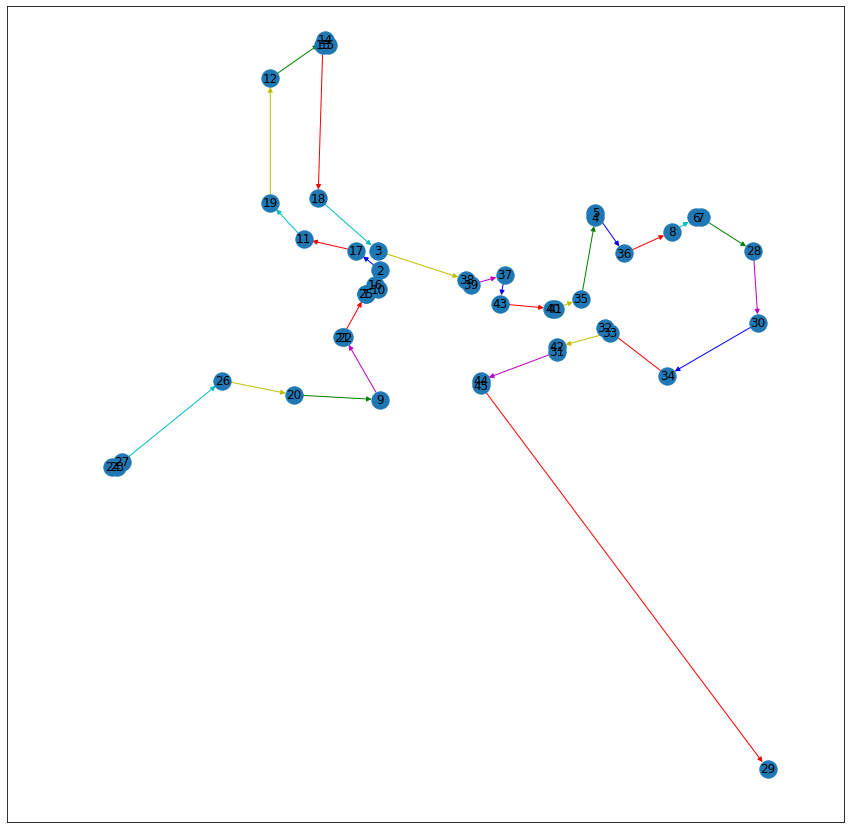

['20']
['21']
['22']
['1', '25', '10']
['25', '10', '16']
['10', '25', '2']
['25', '2', '3']
['2', '17', '25']
['2']
['17']
['11', '18', '19']
['18']
['11', '12', '13']
['15']
['14']
['12']
['11']
['38']
['39']
['43']
['37']
['40']
['41']
['35', '42', '31']
['42']
['32']
['33']
['35']
['36', '4', '5']
['5']
['36']
['8', '6', '7']
['6', '7', '28']
['7']
['6', '30', '34']
['34']
['6']
['44', '45', '9']
['44']
['9', '27', '23']
['24', '27', '9']
['27']
['9']
['29']
6.708203932499369
1e-08
Best fitness obtained:  548.841
Improvement over random step solution:  0.2575


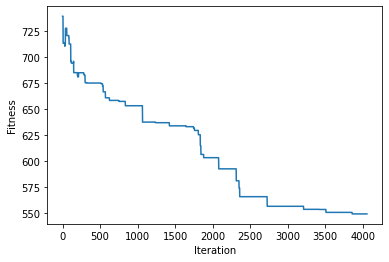

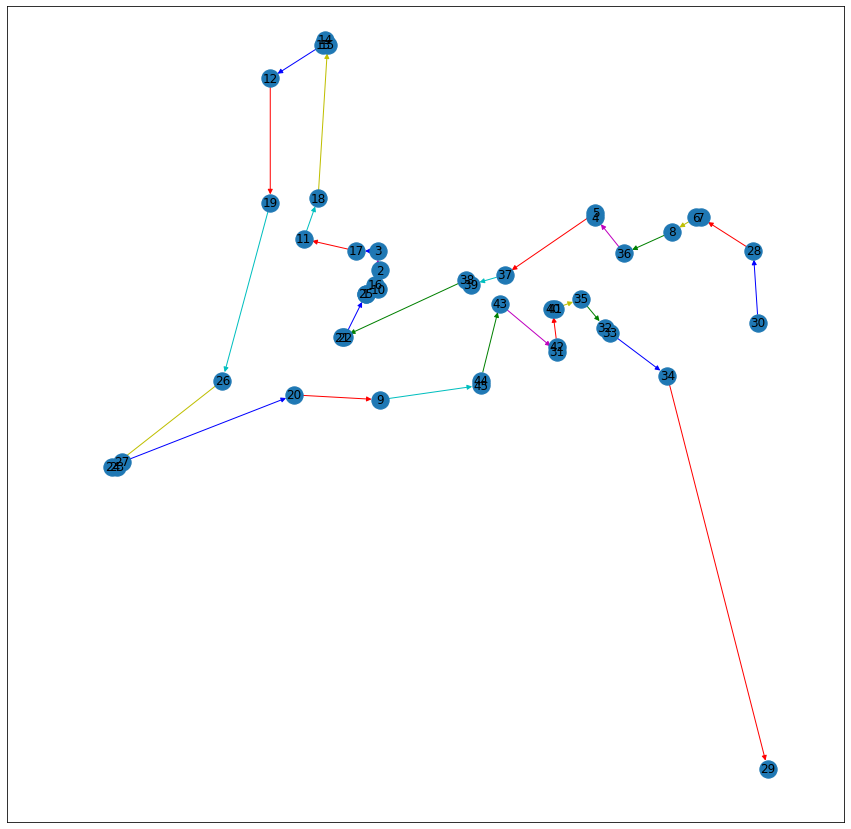

['39']
['43', '37', '40']
['43']
['40', '41', '42']
['40']
['35']
['32', '33', '42']
['33']
['42', '31', '34']
['42']
['44']
['45']
['9']
['22']
['21', '1', '25']
['1']
['10']
['16']
['2', '3', '17']
['2']
['17', '21', '11']
['20', '17', '11']
['18', '19', '17']
['19', '17', '12']
['17']
['20']
['26']
['27']
['23']
['24']
['12']
['13', '15', '14']
['13', '15', '5']
['15', '5', '4']
['4', '36', '8']
['36']
['8']
['6', '7', '28']
['6']
['28', '30', '34']
['30']
['34']
['29', '15']
['15']
6.708203932499369
1e-08
Best fitness obtained:  568.592
Improvement over random step solution:  0.2902


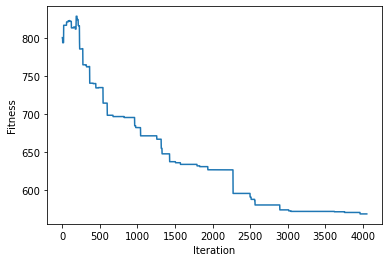

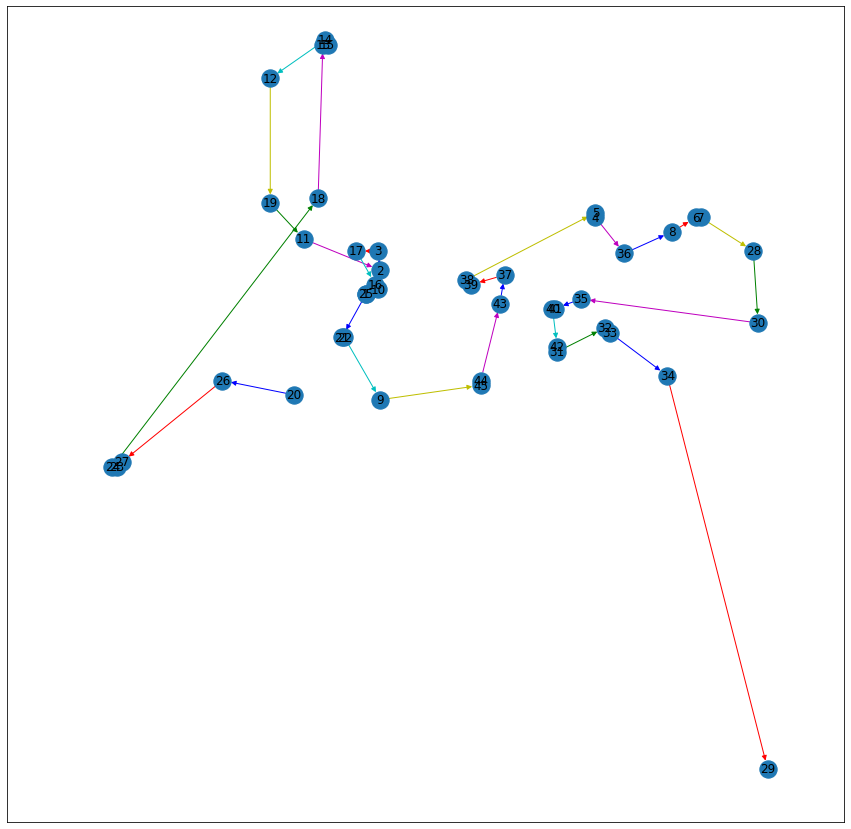

['18']
['11', '17', '3']
['2', '17', '16']
['2']
['16', '10', '25']
['1']
['10', '16', '22']
['16']
['22']
['21', '9', '20']
['21', '20', '45']
['44', '31', '43']
['37', '39', '38']
['39']
['37']
['40', '41', '35']
['41']
['35', '42', '31']
['31', '32', '35']
['32']
['33', '35', '36']
['33', '36', '4']
['5']
['36', '8', '6']
['7']
['8', '28', '36']
['8', '33', '28']
['30']
['34', '8', '33']
['34']
['8', '44', '21']
['20', '11', '26']
['20']
['11', '27', '44']
['12']
['13', '15', '14']
['13', '14', '44']
['14']
['44']
['8']
['29', '27', '23']
['27', '23', '24']
['23', '27']
['23']
6.708203932499369
1e-08
Best fitness obtained:  527.67
Improvement over random step solution:  0.4187


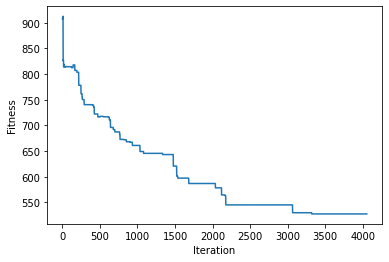

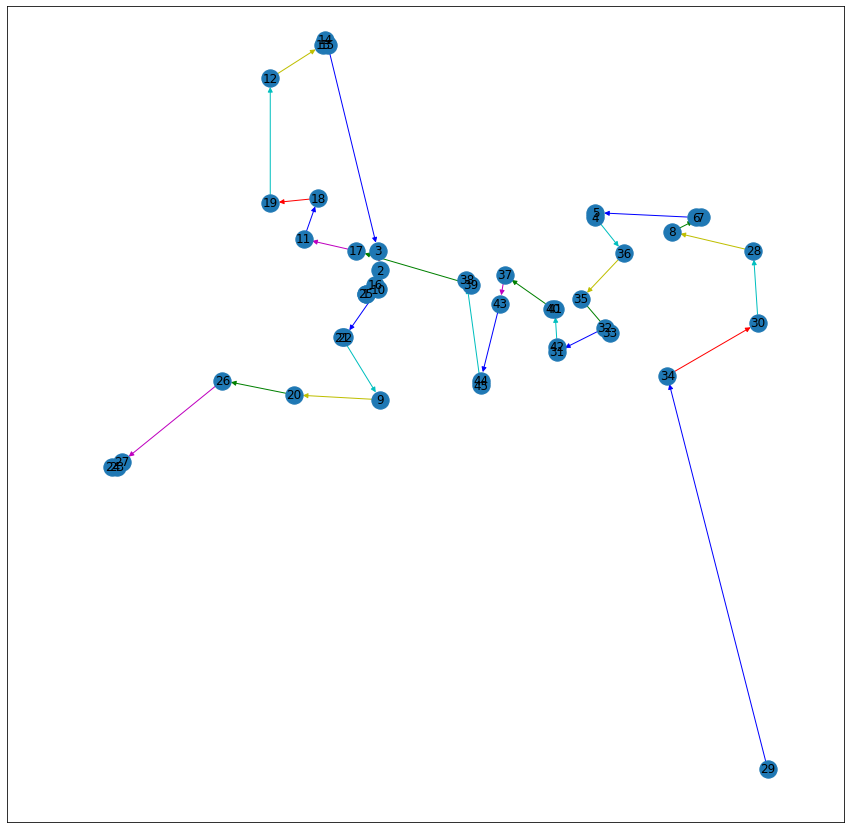

['20', '21', '27']
['23', '24', '20']
['21', '22', '9']
['21', '1', '25']
['25', '10', '16']
['10', '25', '2']
['10', '2', '17']
['3']
['2']
['10', '21', '11']
['18', '19', '10']
['21', '38', '39']
['9', '38', '39']
['38', '43', '37']
['43']
['38']
['40', '41', '44']
['41']
['35', '42', '31']
['42']
['32', '35', '33']
['32']
['35']
['36']
['4']
['5']
['8', '6', '7']
['6']
['8']
['28', '30', '34']
['28', '34', '44']
['28']
['44']
['45', '9', '18']
['45']
['18', '19', '12']
['19']
['12', '13', '15']
['13', '14', '12']
['13', '12', '23']
['12', '23', '24']
['24', '12', '29']
['12']
['29']
6.708203932499369
1e-08
Best fitness obtained:  522.541
Improvement over random step solution:  0.459


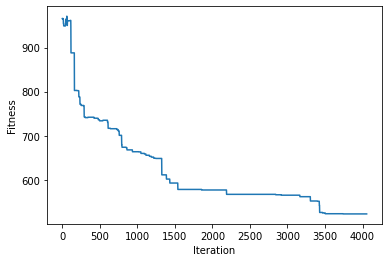

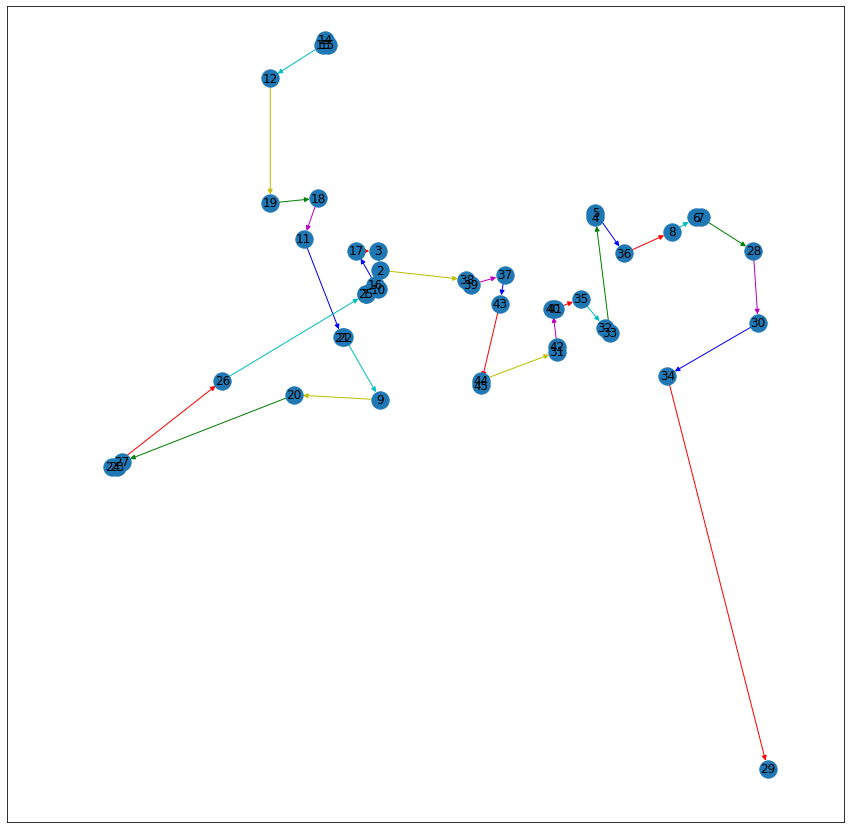

['13']
['14']
['12', '18', '19']
['11']
['19']
['17', '3', '12']
['17']
['3', '2', '16']
['16']
['10']
['25']
['1']
['3', '22', '21']
['21', '9', '20']
['9', '20', '3']
['38']
['39']
['43', '37', '40']
['43']
['40']
['41']
['35', '42', '31']
['31']
['32']
['33']
['35']
['36']
['4']
['5', '8', '6']
['6', '7', '5']
['6', '28', '5']
['28']
['30']
['34', '5', '44']
['45', '9', '34']
['20', '45', '26']
['26']
['27', '23', '24']
['24', '27', '45']
['24', '45', '5']
['45', '5', '34']
['34']
['5']
['29']
6.708203932499369
1e-08
Best fitness obtained:  540.382
Improvement over random step solution:  0.2686


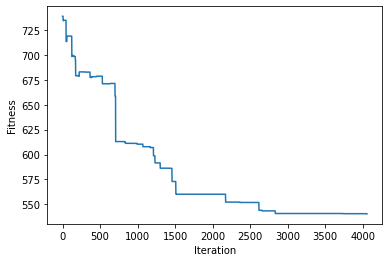

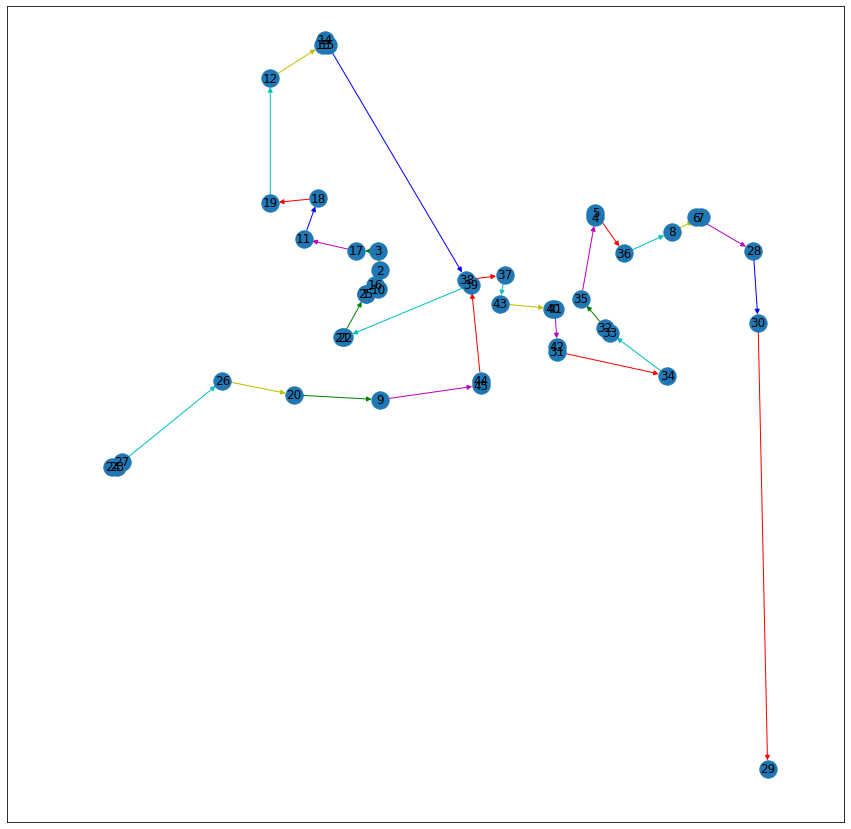

['13']
['14']
['12', '18', '19']
['18', '11', '17']
['11']
['17']
['3', '2', '16']
['2', '16', '10']
['16', '10', '25']
['1']
['10']
['16', '22', '21']
['22', '21', '38']
['21']
['9']
['20']
['26', '27', '45']
['27']
['23']
['24', '45', '44']
['44', '31', '43']
['43', '31', '42']
['37', '39', '38']
['38']
['37']
['40', '41', '35']
['41', '35', '42']
['31']
['41']
['35', '32', '33']
['32', '35', '34']
['32']
['35', '36', '4']
['5', '36', '8']
['6']
['7']
['28', '36', '5']
['36']
['35']
['30', '28', '12']
['30', '12', '29']
['30']
['12', '24']
['24']
6.708203932499369
1e-08
Best fitness obtained:  556.919
Improvement over random step solution:  0.3776


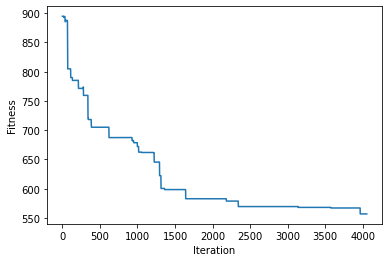

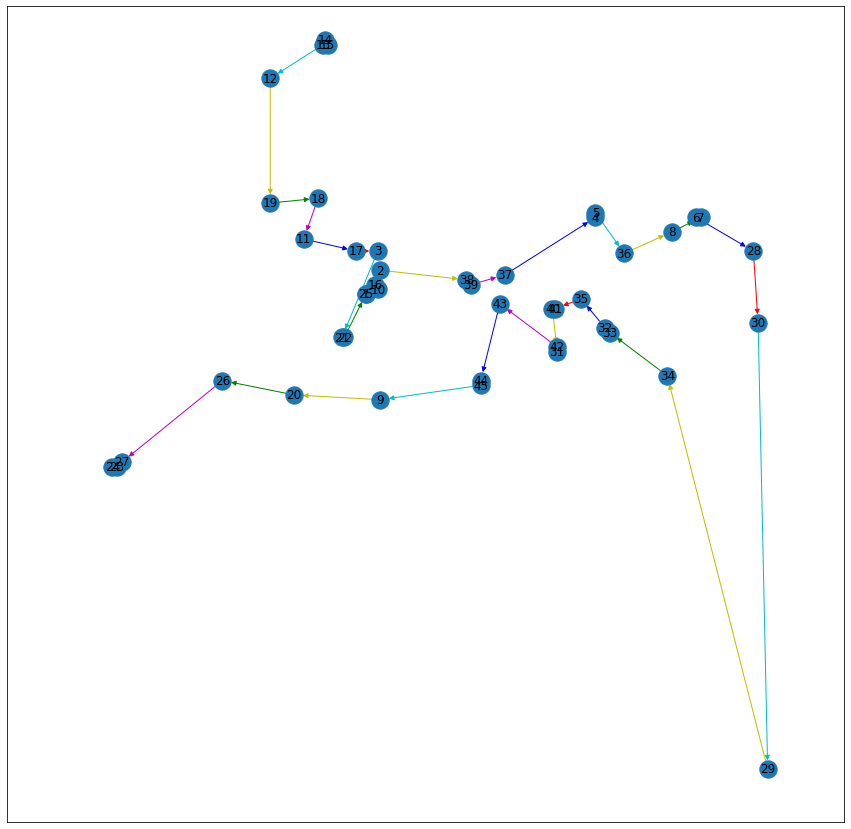

['25', '10', '16']
['10']
['25']
['2']
['3', '17', '22']
['17', '11', '18']
['11']
['19']
['17', '12', '21']
['13']
['15']
['14']
['17', '38', '39']
['22']
['21']
['9', '20', '26']
['26', '9', '27']
['23']
['24']
['26', '9', '45']
['44']
['43', '31', '42']
['31']
['41']
['40', '35', '32']
['40']
['43', '32', '37']
['37']
['39']
['38', '32', '4']
['5', '36', '8']
['6', '7', '36']
['7']
['28', '36', '5']
['5', '32', '33']
['32', '33', '38']
['32']
['34']
['30', '28', '38']
['9', '26', '28']
['9', '30', '28']
['30', '9', '29']
['30', '29']
['29']
6.708203932499369
1e-08
Best fitness obtained:  540.237
Improvement over random step solution:  0.434


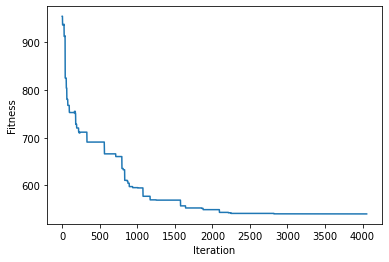

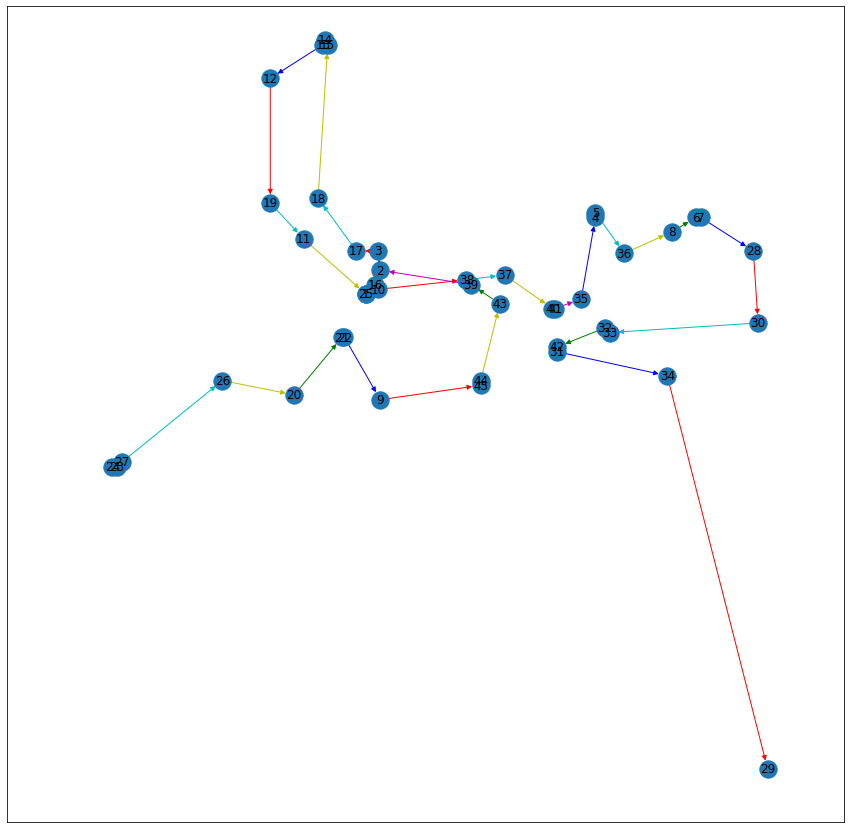

['18', '19', '17']
['18']
['17']
['3', '2', '16']
['16', '3', '10']
['16', '10', '25']
['1', '10', '16']
['16', '1', '22']
['21']
['1', '16', '9']
['1']
['38', '39', '9']
['39']
['43', '37', '40']
['43']
['40']
['41', '35', '42']
['35', '42', '31']
['42']
['32', '35', '33']
['32']
['33', '36', '34']
['4']
['5', '8', '6']
['8', '6', '7']
['6']
['8', '28', '30']
['28']
['8']
['33']
['34']
['44']
['45']
['9', '20', '26']
['20', '27', '23']
['9']
['27']
['23', '24', '12']
['24', '12', '13']
['13']
['15']
['14', '24', '29']
['24']
['29']
6.708203932499369
1e-08
Best fitness obtained:  559.405
Improvement over random step solution:  0.3385


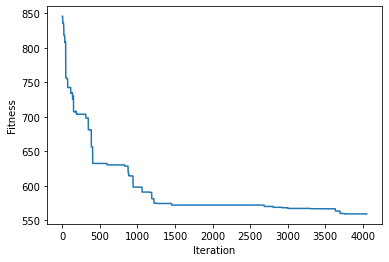

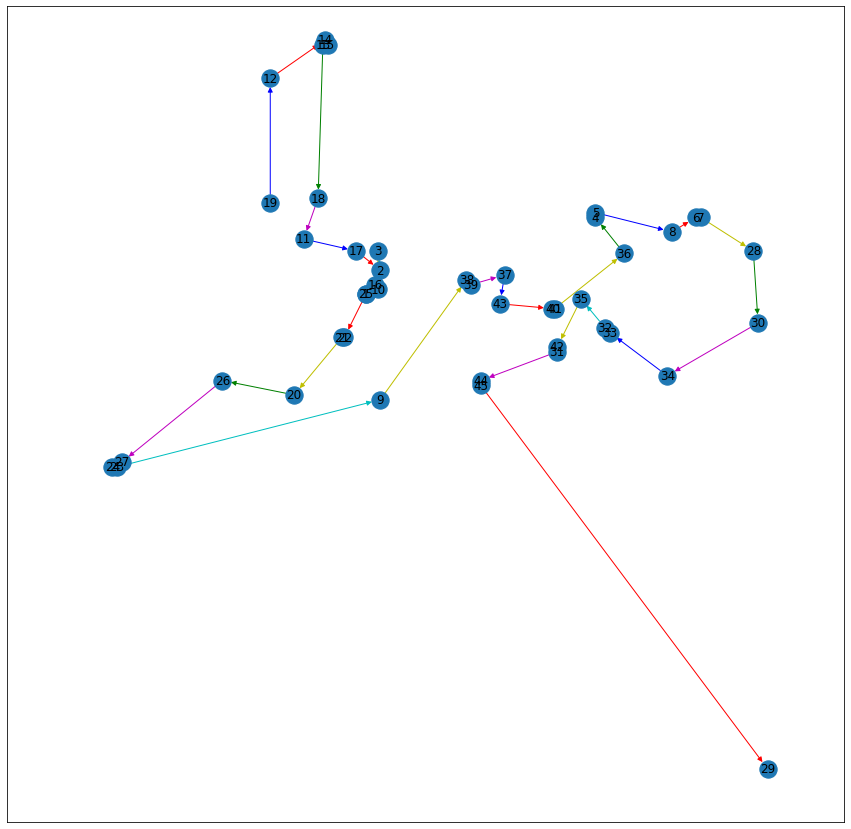

The average distance for the greedy algorithm was: 592.315
The average distance for the random step with k=3 algorithm was: 842.511
The average distance for the simulated annealing for greedy algorithm was: 517.773
The average distance for the simulated annealing for random step with k=3 algorithm was: 541.501


In [28]:
# ANSWER Q8 - Coding
# Each student should perform multiple runs of each algorithm and show results
distAVGGreedy=0
distanceAVGkstep3=0
distAVGsimAn1=0
distAVGsimAn2=0
test=1
# Greedy tests
print("Greedy Tests")
for i in range(10):
    gs1= greedy_solution(manyCities)
    showPath(gs1, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])
    print("Total distance for Greedy Algorithm test "+str(test)+": "+str(totalDist(gs1, distances)))
    distanceAVGGreedy+=totalDist(gs1, distances)
    test+=1
distanceAVGGreedy=round((distanceAVGGreedy/10),3)
test=1
# Random Step tests
print("Random Step Test")
for i in range(10):
    rk3= random_step(manyCities,3)
    showPath(rk3, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])
    print("Total distance for random step with k=3 test "+str(test)+": "+str(totalDist(rk3, distances)))
    distanceAVGkstep3+=totalDist(rk3, distances)
    test+=1
distanceAVGkstep3=round((distanceAVGkstep3/10),3)
test=1

# Simulated Annealing (configuration 1 tests)
print("Simulated Annealinf Configuration 1 Test")
for i in range(10):
    sa = SimAnneal(manyCities, False)
    betterSol = sa.anneal()
    sa.plot_learning()
    showPath(betterSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])
    distAVGsimAn1+= totalDist(betterSol,distances)
distAVGsimAn1=round((distAVGsimAn1/10),3)
test=1
    

# Simulated Annealing (configuration 2 tests)
print("Simulated Annealinf Configuration 2 Test")
for i in range(10):
    sa = SimAnneal(manyCities, True, 3)
    betterSol = sa.anneal()
    sa.plot_learning()
    showPath(betterSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])
    distAVGsimAn2+= totalDist(betterSol,distances)
distAVGsimAn2=round((distAVGsimAn2/10),3)
test=1

print("The average distance for the greedy algorithm was: "+ str(distanceAVGGreedy))
print("The average distance for the random step with k=3 algorithm was: "+ str(distanceAVGkstep3))
print("The average distance for the simulated annealing for greedy algorithm was: "+ str(distAVGsimAn1))
print("The average distance for the simulated annealing for random step with k=3 algorithm was: "+ str(distAVGsimAn2))

ANSWER - Q8 - Discussion part

After running each algorithm 10 times and taking the average, I found that as expected both the configured simulated annealing algorithms performed better than the greedy and random step where k=3 algorithms. Overall however between the simulated annealing with k=3 and simulated aneealing for the greedy algorithm they were both close and they would fluctuate each run. This could be from the randomness in the random step algorithm with it having a k value being 3 giving it more choices of not going to the global maximum.

***SIGNATURE:***
My name is Sy Rajeswaran
My student number is 300005333
I certify being the author of this assignment.